### About the Dataset and the Aim of this project

About the Dataset:

The Dataset is on non-ICU hospital readmission of diabetic patients in the US over a 10 year period (1999-2008). It consists of features such as patient demographics(race, age, gender, weight), medical diagnosis, lab tests, procedures, medications, number of hospital visits in the year preceding readmission, etc. 

The dataset was obtained from the UCI Machine Learning Repository. It was curated by Beata Strack et al in a study conducted in 2014 (Title of paper--> Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records). The clinical data information was obtained from the Health Facts database
(Cerner Corporation, Kansas City, MO), a national data warehouse that collects comprehensive clinical records across
hospitals throughout the United States. The study selected certain features to model the readmission outcome of diabetic patients from this database. The aim of the study was to identify features that predicted early readmission of diabetic patients in the US under non-ICU conditions. Features that satisfied the following criteria were extracted to form the dataset. 

(1) It is an inpatient encounter (a hospital admission).
(2) It is a “diabetic” encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
(3) The length of stay was at least 1 day and at most 14 days.
(4) Laboratory tests were performed during the encounter.
(5) Medications were administered during the encounter.

A total of 55 features were extracted to model the readmission outcome. There are 3 outcomes for readmission--> no readmission, readmission after 30 days(late readmission), readmission within 30 days(early readmission). Hence, the readmission outcome is a categorical variable with 3 classes. 

The aim of this project is divided into 2 parts. The broad aim of this project is to predict hospital readmission of diabetic patients based on the features made available in the dataset. The first aim is to predict early readmission versus the other outcomes(late readmission and no readmission) based on the features available. This is a binary classification problem where the positive class refers to early readmission within 30 days, and the negative class otherwise. The second aim is to predict readmission(early and late) versus no readmission based on the features available. This is also a binary classification problem. Separate classification models were built and evaluated for these 2 different aims. The features that best predicted the readmission outcome were obtained from the best models built.

The aim of this project is fundamentally different from the study that curated the dataset. The study was focused on predicting early readmission of diabetic patients using statistics and Logistic Regression done using a statistcial approach. This project extends the aim of the previous study to predicting both eary readmission and readmission in general(early + late) using machine learning and a variety of different classification models.


### Loading the file and Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# File path
fil = './dataset_diabetes/diabetic_data.csv'

In [3]:
# Load the file
diabetes = pd.read_csv(fil)

In [4]:
pd.set_option('display.max_columns', None)
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Data Dictionary

In [5]:
from IPython.display import Image

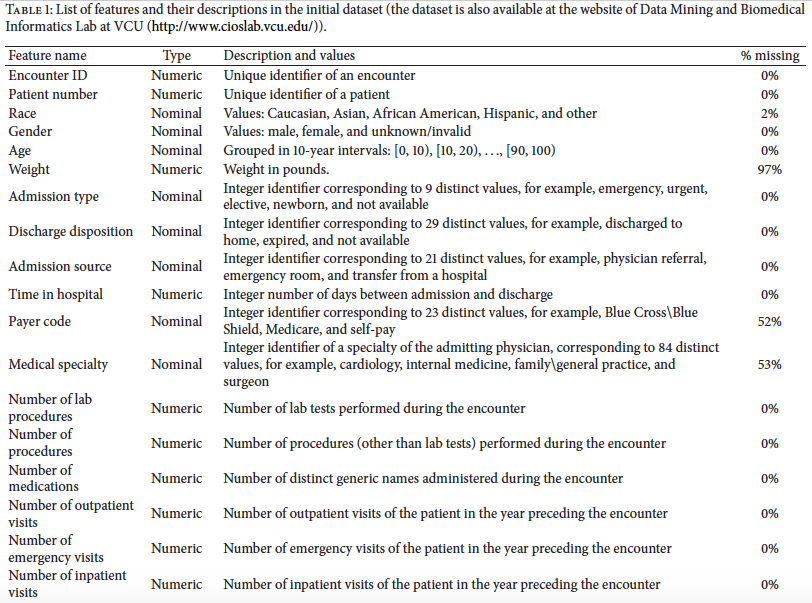

In [6]:
path1 = "./dataset_diabetes/data_dict1.png"
path2 = "./dataset_diabetes/data_dict2.png"
Image(filename=path1)

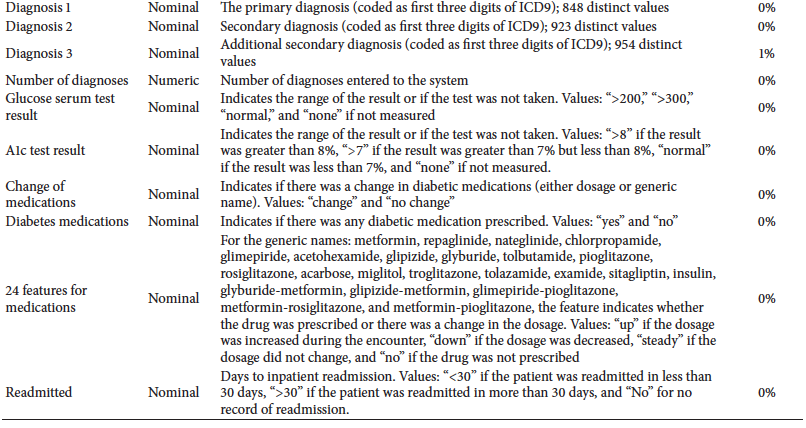

In [7]:
Image(filename=path2)

The data dictionary displayed above is obtained from the study that curated the hospital dataset. There is a mixture of categorical and numerical features/variables. The target variable, 'Readmitted' is a multiclass categorical variable. It will be subsequently recoded into 2 binary categorical variables.

Source: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

### Cleaning Data--> Filling missing values

In [8]:
diabetes['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [10]:
# Missing values are denoted by '?'. Replace '?' with np.nan

for i in diabetes.columns:
    diabetes[i] = diabetes[i].map(lambda x: np.nan if x=='?' else x)

In [11]:
# Looking at the type of variables and number of non-null values per variable
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [12]:
# Finding out the number of missing values per column
diabetes.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [13]:
#Drop columns that have greater than 30% missing values
diabetes.drop(['weight','payer_code','medical_specialty'], axis=1, inplace=True)

In [14]:
diabetes.shape

(101766, 47)

In [15]:
# Dataframe may contain multiple entries per patient
# Filter dataframe to only contain unique patient encounters
diabetes['patient_nbr'].nunique()

71518

In [16]:
diabetes.drop_duplicates('patient_nbr',inplace=True)

In [17]:
#Looking at the race column
diabetes['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'], dtype=object)

In [18]:
#Replace nan values in 'race' with new category called 'Unknown'
diabetes['race'] = diabetes['race'].fillna('Unknown')
diabetes['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Unknown', 'Other', 'Asian',
       'Hispanic'], dtype=object)

In [19]:
#Replace nan values in 'diag_1', 'diag_2', 'diag_3' with 0
diabetes['diag_1'] = diabetes['diag_1'].fillna(0)
diabetes['diag_2'] = diabetes['diag_2'].fillna(0)
diabetes['diag_3'] = diabetes['diag_3'].fillna(0)

In [20]:
#Recheck for missing values
diabetes.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

Summary:
Data cleaning was done. Columns with greater than 30% missing values('weight','payer_code','medical_specialty') were dropped. The column, patient_nbr, was filtered such that it only contains unique entrires per patient. Missing values in the remaining columns were replaced with 0 or with a new category type called 'Unknown'.

### Feature Encoding and creating Dataframe

The features 'diag_1', 'diag_2', 'diag_3' refer to first, second and third diagnosis respectively of the patients.
Diagnosis was indicated with icd9(International Classification of Diseases) codes, which refer to different categories of diseases. The table below, which was obtained from the study, summarises the different categories of diseases and the icd9 codes associated with them.

![alt text](Diagnosis_type.png "Title")

There are different categories of diseases as indicated under the Group name column. Each disease type has dedicated icd9( International Classification of Diseases) codes. The features 'diag_1', 'diag_2', 'diag_3' refer to first, second and third diagnosis respectively. The 'diag_1', 'diag_2' and 'diag_3' features contain the different icd9 codes corresponding to the different categories of diseases. Diabetes is indicated by icd codes of 250.xx. Since the aim of this project is to predict the readmission outcome of patients diagnosed with diabetes, the 'diag_1', 'diag_2' and 'diag_3 were recoded to indicate 3,2,1 for a diagnosis of diabetes respectively and 0 otherwise. A code of 3,2,1 were given to a primary, secondary and tertiary diagnosis of diabetes respectively with a higher number given to indicate a higher importance/relevance of the diabetes diagnosis.

In [22]:
# Convert Diabetes codes(i.e. 250.xx) to 1,2 or 3, rest to 0, for diag_1, diag_2, and diag_3
#For primary diagnoses('diag_1'), code a diabetic encounter as 3
#For secondary diagnoses('diag_2'), code a diabetic encounter as 2
#For tertiary diagnoses('diag_3'), code a diabetic encounter as 1

In [23]:
diabetes['diag_1'] = diabetes['diag_1'].apply(lambda x: 3 if '250' in str(x) else 0)
diabetes['diag_2'] = diabetes['diag_2'].apply(lambda x: 2 if '250' in str(x) else 0)
diabetes['diag_3'] = diabetes['diag_3'].apply(lambda x: 1 if '250' in str(x) else 0)

The 3 diagnosis columns were condensed, i.e. summed horizontally into 1 representative column to indicate diabetes diagnosis. Hence, a higher summed number will indicate a higher importance/relevance of diabetes diagnosis. 

In [24]:
#Add the diag columns together to make a new column diag_diabetes

In [25]:
diabetes['diag_diabetes'] = diabetes['diag_1'] + diabetes['diag_2'] + diabetes['diag_3']

In [26]:
diabetes.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

There are a total of 23 medications that could have been prescribed during the hospital visit. There were 4 encoded labels per medication--> 'No' means that particular medication was not prescribed, 'Steady' means prescription was maintained, 'Down' and 'Up' refer to decreased and increased prescription respectively. These labels were replaced with numbers to rank-hot encode the outcome of the prescription of the medicine. Rank-hot encoding  refers to ordinal encoding of categorical variables with a higher number given to outcomes with a higher weightage. Specifically, encode 'No' as 0, 'Steady' as 1, 'Down' and 'Up' as 2. 

In [28]:
# Getting the list of medications
medicines = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
print len(medicines)

23


In [29]:
# Let us assign a score such that No=0, Steady=1, Down=2, Up=2
for i in medicines:
    diabetes[i] = diabetes[i].map(lambda x: 0 if x=='No' else 1 if x=='Steady' else 2 if x=='Down' else 2)

Features such as 'encounter_id', 'patient_nbr' merely describe the identity of the patient but do not give any additional information to predict the readmission outcome, and hence can be dropped.

In [30]:
# Can drop 'encounter_id', 'patient_nbr' since they do not give us useful information to predict readmission
diabetes.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

The feature 'discharge_disposition_id' refers to the identity of the discharge location of the patient after the hospital visit. The following table below, which was obtained from the study, describes each discharge_dispostion_id.

In [31]:
#Looking at the 'discharge_disposition_id'
discharge_disposition_id = pd.read_excel('./dataset_diabetes/discharge_disposition.xlsx')
pd.set_option('display.max_colwidth', -1)
discharge_disposition_id

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term hospital
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpatient care institution
5,6,Discharged/transferred to home with home health service
6,7,Left AMA
7,8,Discharged/transferred to home under care of Home IV provider
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neonatal aftercare


Some hospital encounters resulted in the discharge of patients to hospices or where the patients passed away. These hospital encounters should be removed since these patients do not have a chance to be readmitted and the aim of this project is to predict hospital readmission. The discharge_disposition_ids refering to these outcomes are 11, 13, 14, 19, 20 and 21.

In [33]:
# 'discharge_disposition_id' referring to discharge to hospices and expiration were removed
remove_ids = [11,13,14,19,20,21]
diabetes1 = diabetes[~diabetes['discharge_disposition_id'].isin(remove_ids)]

Based on literature research, 2 tests are commonly used to test for the presence and severity of diabetes. One is glucose serum test(denoted by 'max_glu_serum') and the other is A1C test(denoted by 'A1Cresult'), which both provide information on the plasma glucose concentration and hence the severity of diabetes. The aim of this study is to predict the features that affect the readmission outcome of diabetic patients. The ordering of a diabetic test and its results are more indicative of diabetes than other features, and thus it makes more sense to investigate entries that contain either or both test results than entries that do not contain either test result. Hence, create a dataframe that contains results of either tests and perform analysis and modeling on it to predict readmission of patients.

In [34]:
# Looking at the levels of the 'max_glu_serum' test
diabetes1['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [35]:
# Looking at the levels of the 'A1Cresult' test
diabetes1['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [36]:
# Subset out the df to only contain rows where diabetes test was done
diabetes2 = diabetes1[(diabetes1['max_glu_serum']!='None') | (diabetes1['A1Cresult']!='None')]

In [37]:
# Double confirm that all the rows(entries) contain a glucose test result

In [40]:
for index,row in diabetes2.iterrows():
    if row['max_glu_serum'] == 'None' and row['A1Cresult'] == 'None':
        print 'error'

Since no error message was printed, all entries in the dataframe have an entry of glucose test results

The target variable is 'readmitted' which indicates the readmission outcome of the patient. It consists of 3 levels, where 'NO' refers to no readmission, '>30' refers to readmission after 30 days(late readmission), '<30' refers to readmission within 30 days(early readmission). 

There are 2 aims to this project. The first aim is to predict early readmission vs other outcomes, while the second aim is to predict readmission(both early and late) vs no readmission. Hence, 2 target/outcome variables were encoded from the 'readmitted' variable. For the first target variable, early readmission is encoded as 1 while the other outcomes(late and no readmission) were encoded as 0. For the second target variable, readmission is encoded as 1 while non-readmission is encoded as 0.

In [42]:
# Looking at the levels of the 'readmitted' outcome 
diabetes2['readmitted'].value_counts()

NO     9643
>30    4915
<30    1389
Name: readmitted, dtype: int64

In [43]:
# Target Variable encoding
# Create 2 y-variables, one where the positive class is readmission <30 days, the other where positive class is presence of readmission
diabetes2['readmitted_p'] = diabetes2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)
diabetes2['readmitted_p30'] = diabetes2['readmitted'].apply(lambda x: 1 if x=='<30' else 0)

/Users/dakshi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dakshi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


The target 'readmitted_p30' is the target variable for the first aim(early readmission vs others) of this project while the target 'readmitted_p' is the target variable for the second aim(readmission vs no readmission) of this study.

In [44]:
# Drop the initial 'readmitted' column since it has been re-encoded as 2 separate y-variables
diabetes2.drop('readmitted', axis=1, inplace=True)

/Users/dakshi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
# Looking at the distribution of the 'readmitted_p30' outcome
diabetes2['readmitted_p30'].value_counts()

0    14558
1    1389 
Name: readmitted_p30, dtype: int64

In [46]:
# Looking at the distribution of the 'readmitted_p' outcome
diabetes2['readmitted_p'].value_counts()

0    9643
1    6304
Name: readmitted_p, dtype: int64

Summary:
The target variable is 'readmitted'. 'No' indicates no readmission, '>30' indicating readmission after 30 days, '<30' indicating readmission within 30days. The first aim of this study is to predict early readmission of diabetic patients with the features describing the hospital visit and procedures and patient demographics. Hence 'No' and '>30' were recoded as 0 while '<30'(early readmission) was recoded as 1 to create a new target variable. The second aim of this study isto predict readmission vs no-readmission of diabetic patients. Hence 'No' wa recoded as 0 while '>30' and '<30' were recoded as 1. The columns 'diag_1', 'diag_2' and 'diag_3' refer to primary, secondary and tertiary diagnoses respectively and were represented using icd9 codes. They were recoded to 0 to denote a non-diabetic diagnosis and 3, 2 or 1 to denote diabetic diagnosis for primary, secondary and tertiary diagnosis respectively. These 3 columns were then combined to one representative column. There were 23 features corresponding to changes in the prescription of 23 different medicines after the hospital encounter. They were rank-hot encoded to reflect the changes in the prescriptions. The discharge_disposition_id indicated where the patients were discharged to after the hospital visit. Patients who were discharged to hospices or expired were removed from the dataset since they do not have a chance of readmission. Next the dataframe was subsetted to only include entires that contained a plasma glucose test result(either 'max_glu_serum' or 'A1Cresult'), since literature research revealed these 2 tests are important for diagnosing diabetes. Patient encounters without plasma glucose test results were not considered as they do not provide sufficient information to indicate the true diabetic status/condition of the patient.

### Checking for Multicollinearity and Filtering--> Numerical Variables

The dataset consists of both numerical and categorical features that can be used to rpedict the readmission outcome. The lists of numerical and categorical features were separately defined. The numerical features need to be checked for multicollinearity and filtered to ensure that the variances of the numerical features do not inflate each other in predicting the outcome of the target variable, hence ensuring that the coefficients of each of the numerical variables do describe the effect of the numerical feature alone in predicting the outcome.

In [47]:
#Check and change dtypes of columns

In [48]:
diabetes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15947 entries, 26 to 101755
Data columns (total 44 columns):
race                        15947 non-null object
gender                      15947 non-null object
age                         15947 non-null object
admission_type_id           15947 non-null int64
discharge_disposition_id    15947 non-null int64
admission_source_id         15947 non-null int64
time_in_hospital            15947 non-null int64
num_lab_procedures          15947 non-null int64
num_procedures              15947 non-null int64
num_medications             15947 non-null int64
number_outpatient           15947 non-null int64
number_emergency            15947 non-null int64
number_inpatient            15947 non-null int64
number_diagnoses            15947 non-null int64
max_glu_serum               15947 non-null object
A1Cresult                   15947 non-null object
metformin                   15947 non-null int64
repaglinide                 15947 non-null int64
na

In [49]:
# Specifying the type of variables
# 'target_variable' is the target variable denoting positive readmission vs no readmission
# 'target_variable_30' is the target variable denoting early readmission vs other outcomes(late and no readmission)
target_variable = ['readmitted_p']
target_variable_30 = ['readmitted_p30']
cat_variables = ['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult','change','diabetesMed','diag_diabetes'] + medicines
num_variables = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

In [50]:
#Create new dataframes for numerical and categorical variables
num = diabetes2.loc[:,num_variables]
cat = diabetes2.loc[:,cat_variables]

The correlation between the numerical variables were checked using a correlation matrix. A correlation of + or -0.8 or above is indicative of multicollinearity, which would require the removal of one of the collinear variable.

In [52]:
corr = num.corr()
corr

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.315010,0.298664,0.522462,-0.034023,-0.023405,0.053131,0.222400
num_lab_procedures,0.315010,1.000000,0.179580,0.263764,-0.109502,-0.041087,0.076177,0.145315
num_procedures,0.298664,0.179580,1.000000,0.482213,-0.026221,-0.026506,-0.005812,0.174342
num_medications,0.522462,0.263764,0.482213,1.000000,0.038060,0.010937,0.029619,0.381385
number_outpatient,-0.034023,-0.109502,-0.026221,0.038060,1.000000,0.109211,0.021816,0.092611
number_emergency,-0.023405,-0.041087,-0.026506,0.010937,0.109211,1.000000,0.123813,0.059260
number_inpatient,0.053131,0.076177,-0.005812,0.029619,0.021816,0.123813,1.000000,0.022267
number_diagnoses,0.222400,0.145315,0.174342,0.381385,0.092611,0.059260,0.022267,1.000000


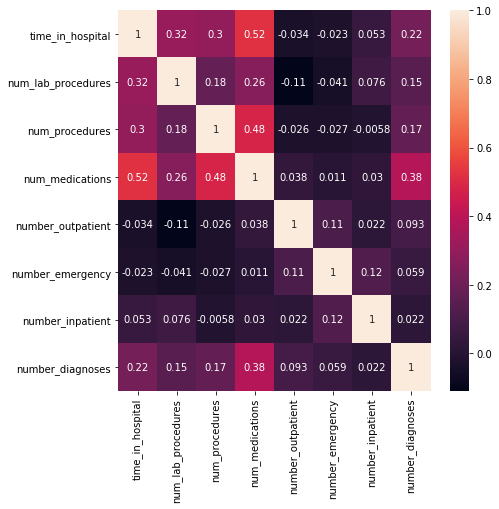

In [53]:
# Getting the correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True)

Using a cutoff of 0.8 or -0.8 for strong correlation, there seems to be no strong correlation between the numerical variables. Next use VIF(Variance Inflation Factor) to check for multicollinearity among the numerical variables. A VIF score of >=5 is indicative of multicollinearity. Features with a VIF score >= 5 will be removed one at a time.

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['VIF_Factor'] = [variance_inflation_factor(num.values, i) for i in range(num.shape[1])]
VIF['Features'] = num.columns

In [57]:
# Getting the VIF scores of the numerical features
VIF.round(1)

,VIF_Factor,Features
0,4.9,time_in_hospital
1,6.6,num_lab_procedures
2,2.0,num_procedures
3,8.3,num_medications
4,1.1,number_outpatient
5,1.1,number_emergency
6,1.1,number_inpatient
7,8.3,number_diagnoses


([<matplotlib.axis.XTick at 0x10db30c90>,
 <a list of 8 Text xticklabel objects>)

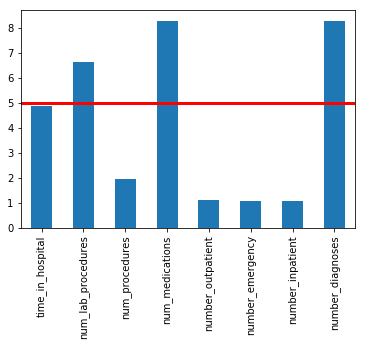

In [58]:
# Getting a plot to show the VIF scores of the numerical features
fig, ax = plt.subplots()
VIF.plot(kind = 'bar',legend = False, ax = ax)
ax.axhline(5, c = 'r', lw = 3)
plt.xticks(range(8), (VIF['Features']))

The red line in the plot above is the cutoff line for multicollinearity, with a VIF score of 5.0. Numerical features above the red line are multicollinear and should be removed. Features with the highest VIF will be dropped one by one, and the resulting VIF of the remaining features will be checked. The dropping of features will be stopped once the VIF of all the remaining features is less than or equal to 5.0.

In [60]:
# Drop feature 'number_diagnoses', which has the highest VIF and check VIF of remaining numerical features. 
num.drop('number_diagnoses',axis=1,inplace=True)
VIF = pd.DataFrame()
VIF['VIF_Factor'] = [variance_inflation_factor(num.values, i) for i in range(num.shape[1])]
VIF['Features'] = num.columns
VIF.round(1)

,VIF_Factor,Features
0,4.8,time_in_hospital
1,4.6,num_lab_procedures
2,2.0,num_procedures
3,6.7,num_medications
4,1.1,number_outpatient
5,1.1,number_emergency
6,1.1,number_inpatient


In [61]:
# Drop feature 'num_medications', which has the next highest VIF and check VIF of remaining numerical features. 
num.drop('num_medications',axis=1,inplace=True)
VIF = pd.DataFrame()
VIF['VIF_Factor'] = [variance_inflation_factor(num.values, i) for i in range(num.shape[1])]
VIF['Features'] = num.columns
VIF.round(1)

,VIF_Factor,Features
0,3.7,time_in_hospital
1,3.6,num_lab_procedures
2,1.7,num_procedures
3,1.1,number_outpatient
4,1.1,number_emergency
5,1.1,number_inpatient


([<matplotlib.axis.XTick at 0x114787d10>,
 <a list of 6 Text xticklabel objects>)

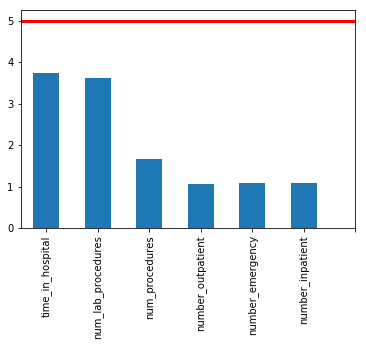

In [62]:
fig, ax = plt.subplots()
VIF.plot(kind = 'bar',legend = False, ax = ax)
ax.axhline(5, c = 'r', lw = 3)
plt.xticks(range(7), (VIF['Features']))

All remaining numerical features have VIF<5, which is indicative of low multicollinearity. Hence, we don't need to drop any more numerical features.

Next need to drop features with zero variance since such features will not provide much information on the target variable. A feature has zero variance if all the values of the feature are identical, and has near zero variance if >=95% of the values are identical. The function below identifies features with zero and near zero variance.

In [65]:
### Zero-variance code to drop columns with zero or near zero variance for numerical variables
def nearZeroVariance(X, freqCut = 95 / 5, uniqueCut = 10):
    '''
    Determine predictors with near zero or zero variance.
    Inputs:
    X: pandas data frame
    freqCut: the cutoff for the ratio of the most common value to the second most common value
    uniqueCut: the cutoff for the percentage of distinct values out of the number of total samples
    Returns a tuple containing a list of column names: (zeroVar, nzVar)
    '''

    colNames = X.columns.values.tolist()
    freqRatio = dict()
    uniquePct = dict()

    for names in colNames:
        counts = (
            (X[names])
            .value_counts()
            .sort_values(ascending = False)
            .values
            )

        if len(counts) == 1:
            freqRatio[names] = -1
            uniquePct[names] = (len(counts) / len(X[names])) * 100
            continue

        freqRatio[names] = counts[0] / counts[1]
        uniquePct[names] = (len(counts) / len(X[names])) * 100

    zeroVar = list()
    nzVar = list()
    for k in uniquePct.keys():
        if freqRatio[k] == -1:
            zeroVar.append(k)

        if uniquePct[k] < uniqueCut and freqRatio[k] > freqCut:
            nzVar.append(k)

    return(zeroVar, nzVar)

In [66]:
zeroVar, nzVar = nearZeroVariance(num)

In [67]:
print zeroVar
print nzVar

[]
[]


There are no numerical features with zero or near-zero variance. Hence, don't need to drop any more numerical features

In [69]:
# Looking at the descriptive statistics of the remaining numerical features
num.describe()

,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient
count,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000
mean,4.661316,49.275977,1.215652,0.272841,0.111933,0.137581
std,3.038382,19.681046,1.713767,1.030327,0.474827,0.542335
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,51.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,63.000000,2.000000,0.000000,0.000000,0.000000
max,14.000000,132.000000,6.000000,36.000000,13.000000,8.000000


The 3 numerical features, 'number_outpatient', 'number_emergency' and 'number_inpatient' have a lot of 0 values (greater than 75% of the data is 0).

The distribution/count of these 3 numerical variables were checked.

In [71]:
num['number_emergency'].value_counts()

0     14701
1     917  
2     219  
3     68   
4     20   
5     9    
6     5    
7     3    
8     2    
13    1    
11    1    
10    1    
Name: number_emergency, dtype: int64

In [72]:
num['number_inpatient'].value_counts()

0    14550
1    941  
2    274  
3    89   
4    54   
5    20   
6    12   
7    6    
8    1    
Name: number_inpatient, dtype: int64

In [73]:
num['number_outpatient'].value_counts()

0     13888
1     1031 
2     483  
3     276  
4     125  
5     72   
6     28   
7     17   
8     6    
10    4    
11    4    
9     3    
14    2    
35    1    
27    1    
22    1    
36    1    
26    1    
13    1    
17    1    
16    1    
Name: number_outpatient, dtype: int64

Summary:
Multicollinear numerical features with a Variance Inflation factor (VIF) greater than 5 were removed. Based on VIF, the features 'num_medications' and 'number_diagnoses' were removed. There were no numerical features with zero variance or near-zero variance (with a cutoff of 95% similar values in the column). 

The numerical features 'number_outpatient', 'number_emergency' and 'number_inpatient' contain a value of zero for greater than 75% of the rows.

### EDA and Feature Engineering for Numerical Variables

The distribution of the numerical features were checked using boxplots.

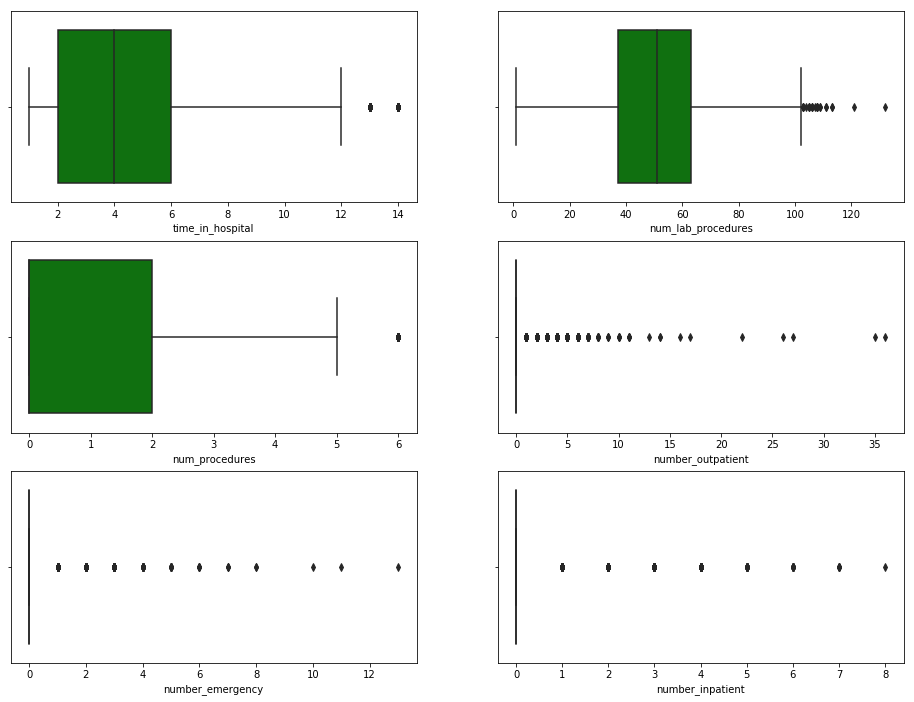

In [76]:
# Looking at the distribution of the numerical variables
fig, axes = plt.subplots(3,2, figsize=(16,12))
sns.boxplot(x='time_in_hospital', data= diabetes2, color = 'green', ax=axes[0,0])
sns.boxplot(x='num_lab_procedures', data= diabetes2, color = 'green', ax=axes[0,1])
sns.boxplot(x='num_procedures', data= diabetes2, color = 'green', ax=axes[1,0])
sns.boxplot(x='number_outpatient', data= diabetes2, color = 'green', ax=axes[1,1])
sns.boxplot(x='number_emergency', data= diabetes2, color = 'green', ax=axes[2,0])
sns.boxplot(x='number_inpatient', data= diabetes2, color = 'green', ax=axes[2,1])

Outliers are points that lie 1.5*IQR(Inter-quartile range) outside of the 3rd quartile(75th percentile). These points are indicated by points that lie outside the upper(right) whisker of the boxplot.
There are many outliers, esp in 'number_outpatient', 'number_emergency', 'number_inpatient', whereby all the outlier points are nonzero while the normal points are 0.

Since there are many outliers/zero values, the numerical variabels should be normalized instead of being standardized.

In [77]:
# Normalizing numerical features
num_cols = list(num.columns)
num_index = list(num.index)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
normalized = mm.fit_transform(num)
num1 = pd.DataFrame(normalized, columns=num_cols, index=num_index)

In [78]:
# Lookign at the descriptive statistics of the numerical features after normalization
num1.describe()

,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient
count,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000,15947.000000
mean,0.281640,0.368519,0.202609,0.007579,0.008610,0.017198
std,0.233722,0.150237,0.285628,0.028620,0.036525,0.067792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.274809,0.000000,0.000000,0.000000,0.000000
50%,0.230769,0.381679,0.000000,0.000000,0.000000,0.000000
75%,0.384615,0.473282,0.333333,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A new dataframe is built with the removal of numerical features that have a VIF>5.0 and containing normalized numerical features.

In [80]:
# Drop 'num_medications' and  'number_diagnoses' whcih have a high VIF of >= 5.0
diabetes2.drop(['num_medications','number_diagnoses'], axis=1, inplace=True)

/Users/dakshi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
# Removing the numerical features and adding the normalized numerical features
diabetes3 = diabetes2.drop(num_cols, axis=1)
diabetes3 = diabetes3.merge(num1, left_index=True, right_index=True, how='outer')

In [82]:
diabetes3.head(2)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_diabetes,readmitted_p,readmitted_p30,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient
26,Caucasian,Male,[80-90),1,3,7,None,>7,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ch,Yes,0,0,0,0.384615,0.480916,0.5,0.0,0.0,0.000
74,Caucasian,Female,[70-80),1,3,7,None,>7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,Ch,Yes,0,1,0,0.307692,0.251908,0.0,0.0,0.0,0.125


Replotting the normalized numerical features

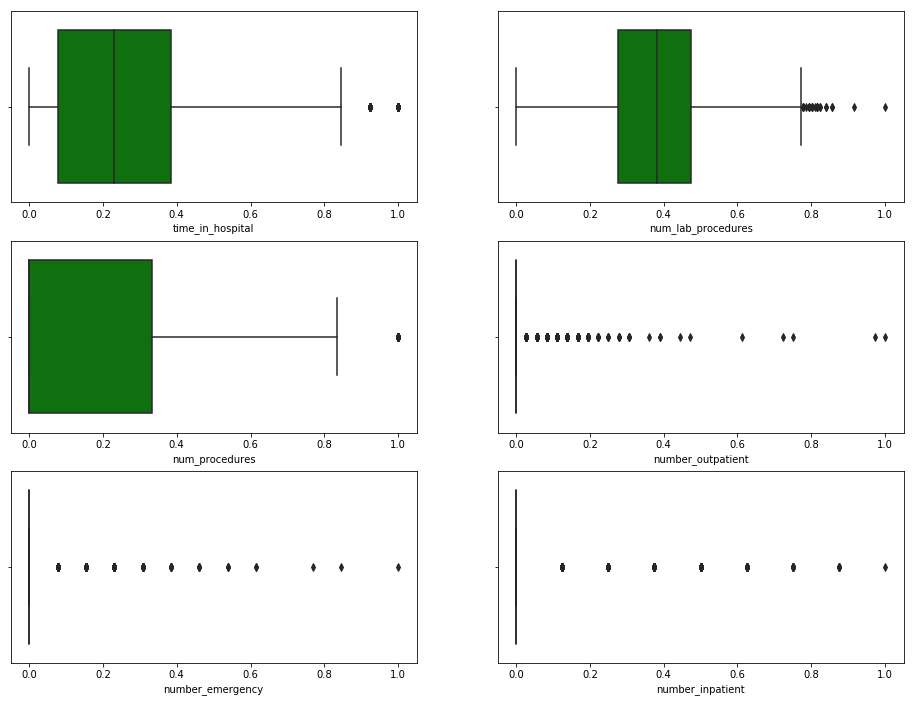

In [83]:
# Plotting the distribution of the normalized numerical features
fig, axes = plt.subplots(3,2, figsize=(16,12))
sns.boxplot(x='time_in_hospital', data= diabetes3, color = 'green', ax=axes[0,0])
sns.boxplot(x='num_lab_procedures', data= diabetes3, color = 'green', ax=axes[0,1])
sns.boxplot(x='num_procedures', data= diabetes3, color = 'green', ax=axes[1,0])
sns.boxplot(x='number_outpatient', data= diabetes3, color = 'green', ax=axes[1,1])
sns.boxplot(x='number_emergency', data= diabetes3, color = 'green', ax=axes[2,0])
sns.boxplot(x='number_inpatient', data= diabetes3, color = 'green', ax=axes[2,1])

In [84]:
import warnings
warnings.filterwarnings('ignore')

Next, count and proportion plots of the 6 numerical variables across the different classes of the target variable were obtained to visualise the distribution of the normal/zero points versus the outlier/nonzero points across the classes of the target variables. This was done in an attempt to explain the phenomenon of numerous outliers. Specifically, we are checking to see if the outliers are concentrated more in one class of the target variable, thus helping to differentiate between the different classes of the target variable. Specifically, we are checking to see if the outliers are the major differentiators between classes membership.

A class was defined for the plotting of the count and proportion plots of the numerical features.

In [85]:
# Writing a class to plot the class distribution(distribution across 'readmission' variable) of normal vs outlier points
class Catplots_num(object):
   
    '''
    Class to plot the distibution of normal vs outlier points of a numerical feature across the different classes
    of 'readmission' target variable. Init function takes in the arguments of the name of the numerical feature 
    of interest, the target variable name(e.g. 'readmission'), and the name of the dataframe.
    
    The function 'norm_outliers' returns a dataframe of the feature of interest and the target variable, with the 
    datapoints of the feature of interest labelled as normal or outlier points(that lie 1.5*IQR out of the 75th 
    percentile). The function 'norm_normzero' returns a dataframe of the feature of interest and the target variable, 
    with the datapoints of the feature of interest labelled as nonzero(if data is not 0) or zero(if data is 0). 
    The function 'countplot' returns a plot of the counts of normal/nonzero and outliers/zero points across the
    different classes of the target variable. The function 'prop_plot' plots the proportion of the counts of 
    normal/nonzero and outliers/zero points across the different classes of the target variable.
    '''
    
    def __init__(self, feature, target, df):
        self.feature = feature
        self.target = target
        self.df = df
        
    def norm_outliers(self,upper=75,lower=25,IQRM=1.5):
        IQR = np.percentile(np.array(self.df[self.feature]), upper) - np.percentile(np.array(self.df[self.feature]), lower)
        self.IQR_15 = np.percentile(np.array(self.df[self.feature]), upper) + IQR*IQRM
        df_no = self.df[[self.feature,self.target]]
        df_no[self.feature] = df_no[self.feature].apply(lambda x: 'outliers' if x>self.IQR_15 else 'normal')
        self.df_no = df_no
        return self.df_no
        
    def norm_nonzero(self):
        df_no = self.df[[self.feature,self.target]]
        df_no[self.feature] = df_no[self.feature].apply(lambda x: 'nonzero' if x>0 else 'zero')
        self.df_no = df_no
        return self.df_no
    
    def countplot(self):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
        x = pd.crosstab(self.df_no[self.target], self.df_no[self.feature])
        y = relative = x.div(x.sum(axis=0), axis=1)
        y = relative.T.plot(kind='bar', stacked=True, ax=ax1)
        ax1.set_ylabel("proportion")
        z = sns.countplot(self.feature, hue=self.target, data=self.df_no, palette='husl', ax=ax2)
        return y,z
    

For a specific feature, use norm_outliers function or norm_nonzero function, but not both for the same feature

Use norm_outliers for 'time_in_hospital', 'num_lab_procedures' due to presence of some outliers

Use norm_nonzero for 'number_outpatient', 'number_emergency', 'number_inpatient' due to the presence of many zero values

(<matplotlib.axes._subplots.AxesSubplot at 0x1164bc650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11695b150>)

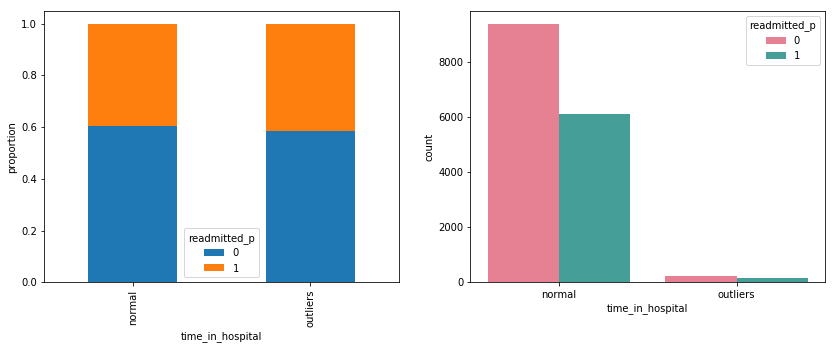

In [88]:
f1 = Catplots_num('time_in_hospital', 'readmitted_p', diabetes3)
f1.norm_outliers()
f1.countplot()

(<matplotlib.axes._subplots.AxesSubplot at 0x116686310>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116f5e290>)

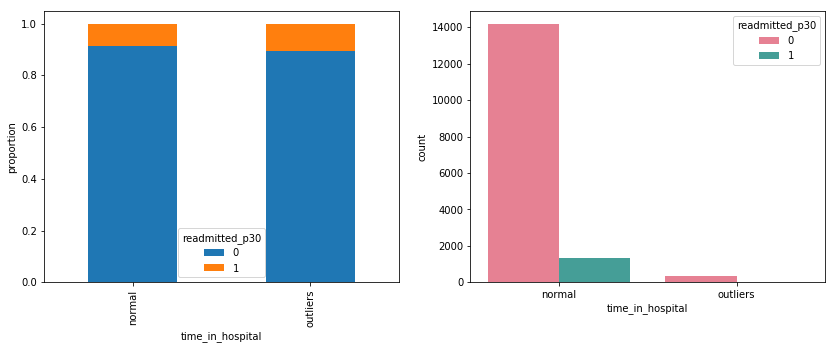

In [89]:
f1_30 = Catplots_num('time_in_hospital', 'readmitted_p30', diabetes3)
f1_30.norm_outliers()
f1_30.countplot()

The plot on the left is a proportion plot that looks at the proportion of normal and outlier points across each class category. The plot of the right looks at the count of normal and outlier points across each class category. This same rule applies to all the plots below.

The outcome feature 'readmitted_p' refers to readmission(class 1) versus no readmission (class 0). The outcome feature 'readmitted_p30' refers to early readmission(class 1) versus non-early readmission(class 0, consists of classes readmitted '>30 days' and not readmitted).

Based on the plots above, there is a slightly higher proportion of outliers in the early readmission class as compared to non-early readmission class, and also a slightly higher proportion of outliers in readmission class as compared to non-readmission class for the feature 'time_in_hospital'. Hence, the outliers are more concentrated in the positive class. This suggests that the outliers of 'time_in_hospital' may be a stronger driver of readmission. The trend for both early readmission and readmission is the same. The trend for both early readmission and readmission is similar.

(<matplotlib.axes._subplots.AxesSubplot at 0x116f135d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11720b5d0>)

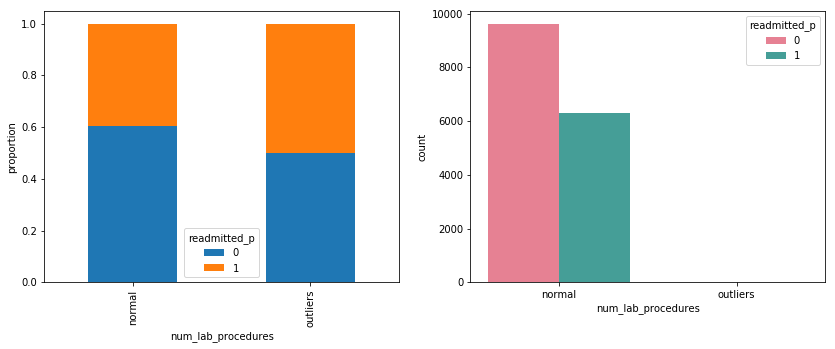

In [90]:
f2 = Catplots_num('num_lab_procedures', 'readmitted_p', diabetes3)
f2.norm_outliers()
f2.countplot()

(<matplotlib.axes._subplots.AxesSubplot at 0x1170a55d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1174b1c50>)

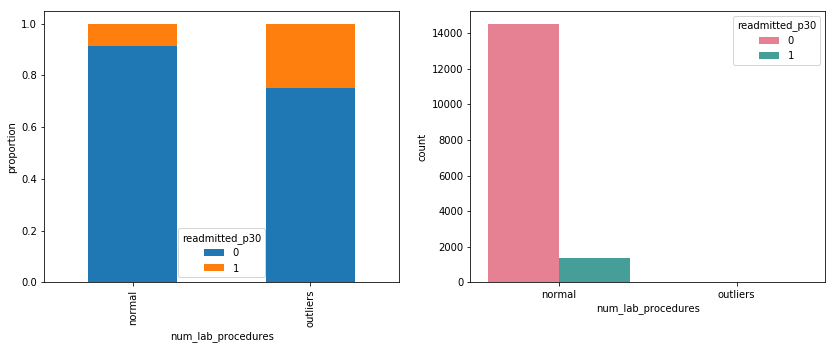

In [91]:
f2_30 = Catplots_num('num_lab_procedures', 'readmitted_p30', diabetes3)
f2_30.norm_outliers()
f2_30.countplot()

Based on the plots above, there is a much higher proportion of outliers in the early readmission class as compared to non-early readmission class, and also a much higher proportion of outliers in readmission class as compared to non-readmission class for the feature 'num_lab_procedures'. Hence, the outliers are more concentrated in the positive classes. This suggests that the outliers of 'num_lab_procedures' may be a stronger driver of readmission, for both early readmission and readmission. The trend for both early readmission and readmission is similar.

(<matplotlib.axes._subplots.AxesSubplot at 0x1174d6e50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117761fd0>)

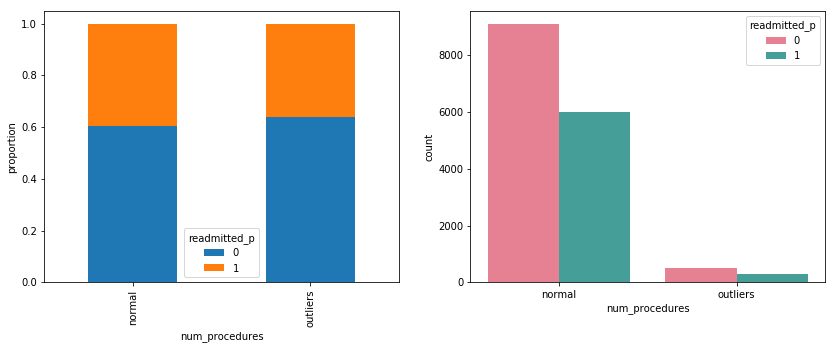

In [92]:
f3 = Catplots_num('num_procedures', 'readmitted_p', diabetes3)
f3.norm_outliers()
f3.countplot()

(<matplotlib.axes._subplots.AxesSubplot at 0x117722050>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117a15050>)

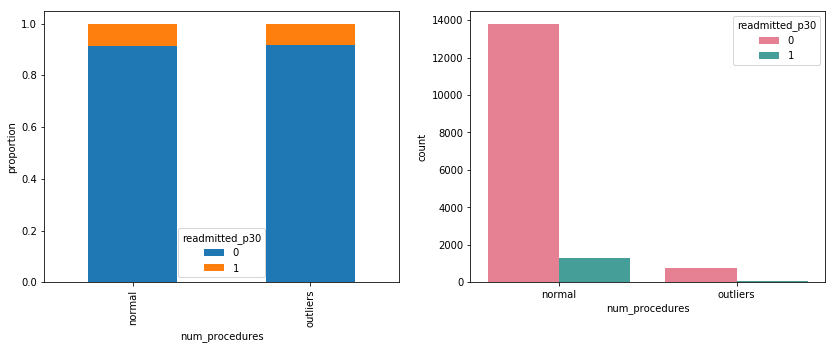

In [93]:
f3_30 = Catplots_num('num_procedures', 'readmitted_p30', diabetes3)
f3_30.norm_outliers()
f3_30.countplot()

Based on the plots above, there is a slightly lower proportion of outliers in the early readmission class as compared to non-early readmission class, and also a much slightly lower proportion of outliers in readmission class as compared to non-readmission class for the feature 'num_procedures'. Hence, the outliers are more concentrated in the negative classes. This suggests that the outliers of 'num_lab_procedures' may not be a stronger driver of readmission, for both early readmission and readmission. The trend for both early readmission and readmission is similar.

(<matplotlib.axes._subplots.AxesSubplot at 0x1179c9350>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117cc24d0>)

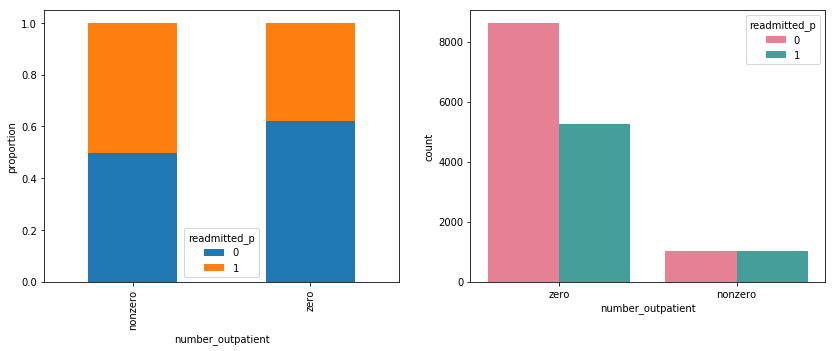

In [94]:
f4 = Catplots_num('number_outpatient', 'readmitted_p', diabetes3)
f4.norm_nonzero()
f4.countplot()

(<matplotlib.axes._subplots.AxesSubplot at 0x117b18f90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117e4b410>)

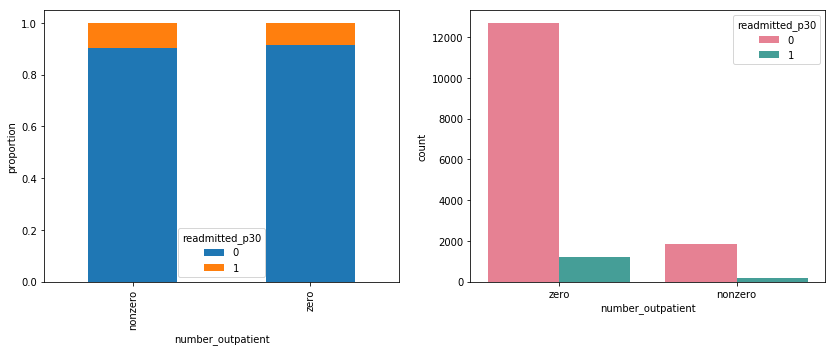

In [95]:
f4_30 = Catplots_num('number_outpatient', 'readmitted_p30', diabetes3)
f4_30.norm_nonzero()
f4_30.countplot()

Based on the plots above, there is a slightly higher proportion of nonzero points in the early readmission class as compared to non-early readmission class, and also a much higher proportion of nonzero points in readmission class as compared to non-readmission class for the feature 'number_outpatient'. Hence, the nonzero(outlier) points are more concentrated in the positive classes. This suggests that the nonzero points of 'number_outpatient' may be a stronger driver of readmission, for both early readmission and readmission. The trend for both early readmission and readmission is similar.

(<matplotlib.axes._subplots.AxesSubplot at 0x117e01750>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11967bfd0>)

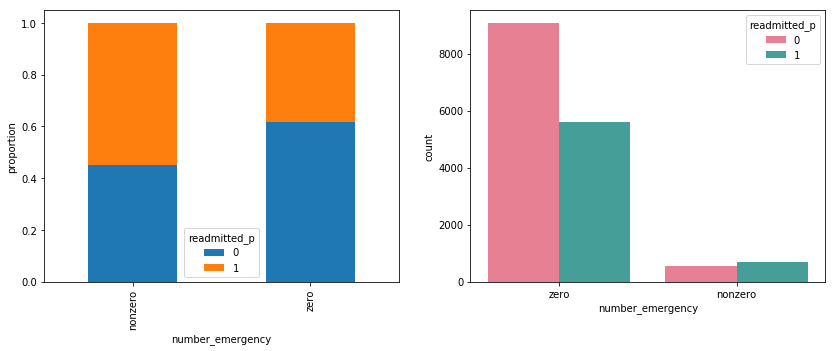

In [96]:
f5 = Catplots_num('number_emergency', 'readmitted_p', diabetes3)
f5.norm_nonzero()
f5.countplot()

(<matplotlib.axes._subplots.AxesSubplot at 0x119699ed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119932150>)

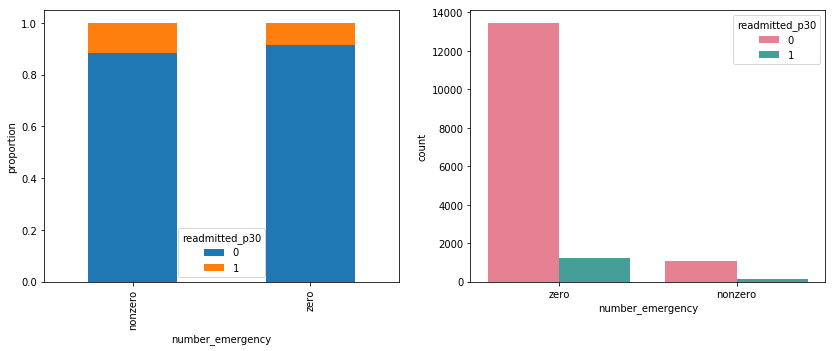

In [97]:
f5_30 = Catplots_num('number_emergency', 'readmitted_p30', diabetes3)
f5_30.norm_nonzero()
f5_30.countplot()

Based on the plots above, there is a much higher proportion of nonzero points in the early readmission class as compared to non-early readmission class, and also a much higher proportion of nonzero points in readmission class as compared to non-readmission class for the feature 'number_emergency'. Hence, the nonzero(outlier) points are mroe concentrated in the positive classes. This suggests that the nonzero points of 'number_emergency' may be a stronger driver of readmission, for both early readmission and readmission. The trend for both early readmission and readmission is similar.

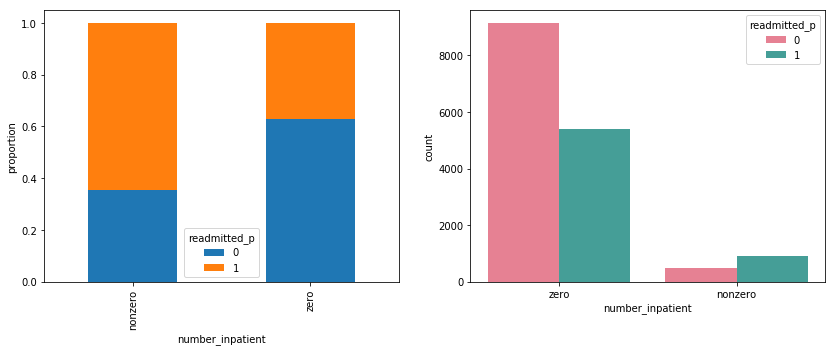

In [98]:
f6 = Catplots_num('number_inpatient', 'readmitted_p', diabetes3)
f6_no = f6.norm_nonzero()
f6_p = f6.countplot()

(<matplotlib.axes._subplots.AxesSubplot at 0x119bfd290>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119e8b4d0>)

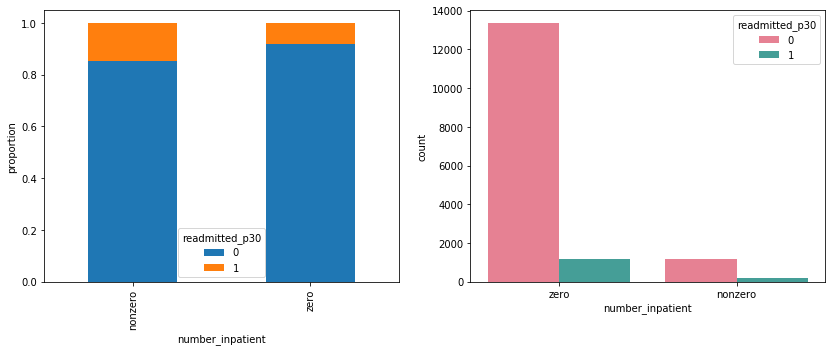

In [99]:
f6_30 = Catplots_num('number_inpatient', 'readmitted_p30', diabetes3)
f6_30.norm_nonzero()
f6_30.countplot()

Based on the plots above, there is a much higher proportion of nonzero points in the early readmission class as compared to non-early readmission class, and also a much higher proportion of nonzero points in readmission class as compared to non-readmission class for the feature 'number_inpatient'. Hence the nonzero(outlier) points are more concentrated in the positive classes. This suggests that the nonzero points of 'number_inpatient' may be a stronger driver of readmission, for both early readmission and readmission. The trend for both early readmission and readmission is similar.

The class distribution of the target variables were checked.

In [100]:
#Finding out the class distribution of target variable for readmission vs no readmission
ratio = diabetes3['readmitted_p'].value_counts()
ratio_0 = float(ratio[0])/(ratio[0]+ratio[1])
ratio_1 = float(ratio[1])/(ratio[0]+ratio[1])
print 'Class 0 ratio:', ratio_0
print 'Class 1 ratio:', ratio_1

Class 0 ratio: 0.604690537405
Class 1 ratio: 0.395309462595


In [101]:
#Finding out the class distribution of target variable for early readmission vs non-early readmission class
ratio = diabetes3['readmitted_p30'].value_counts()
ratio_0 = float(ratio[0])/(ratio[0]+ratio[1])
ratio_1 = float(ratio[1])/(ratio[0]+ratio[1])
print 'Class 0 ratio:', ratio_0
print 'Class 1 ratio:', ratio_1

Class 0 ratio: 0.912898977864
Class 1 ratio: 0.0871010221358


### EDA on Categorical Variables for Feature Engineering

Next, EDA was done on the categorical features to provide insight for feature engineering.

In [102]:
# Checking the number of levels of each categorical variables
for i in cat.columns:
    print i+':',cat[i].unique(), '# of levels:', cat[i].nunique()

race: ['Caucasian' 'Other' 'AfricanAmerican' 'Hispanic' 'Asian' 'Unknown'] # of levels: 6
gender: ['Male' 'Female'] # of levels: 2
age: ['[80-90)' '[70-80)' '[50-60)' '[60-70)' '[30-40)' '[90-100)' '[40-50)'
 '[10-20)' '[0-10)' '[20-30)'] # of levels: 10
admission_type_id: [1 6 3 2 5 8 4 7] # of levels: 8
discharge_disposition_id: [ 3  1  2 25  6 10  7  5  4  8 18 17 16 22 23  9 15 28] # of levels: 18
admission_source_id: [ 7  1  4  2 20  3 17  5  6  8  9 14 10 22 25] # of levels: 15
max_glu_serum: ['None' '>300' 'Norm' '>200'] # of levels: 4
A1Cresult: ['>7' '>8' 'Norm' 'None'] # of levels: 4
change: ['Ch' 'No'] # of levels: 2
diabetesMed: ['Yes' 'No'] # of levels: 2
diag_diabetes: [0 2 3 1 4 5 6] # of levels: 7
metformin: [1 0 2] # of levels: 3
repaglinide: [0 1 2] # of levels: 3
nateglinide: [0 1 2] # of levels: 3
chlorpropamide: [0 1] # of levels: 2
glimepiride: [0 1 2] # of levels: 3
acetohexamide: [0] # of levels: 1
glipizide: [0 1 2] # of levels: 3
glyburide: [1 0 2] # of levels

Some categorical variables contain multiple levels. For the variables with multiple levels, such as 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', check the relationship of these variables with the 'readmitted' outcome in order to bin them into a smaller number of levels.

The count and proportion plots of these categorical features across the different levels of the target variables were obtained. The levels of a categorical feature that have a similar relationship to 'readmitted' outcome were combined into one level. This was done to condense/reduce the levels of a categorical variable with multiple levels in order to increase the variance and statistical power of the categorical variables.

In [103]:
class Catplots(object):
    
    '''
    Class to plot the count/proportion of each level of a categorical feature across the different classes of 
    'readmission' target variable. Init function takes in the arguments of the name of the categorical feature of 
    interest, the target variable name(e.g. 'readmission'), and the name of the dataframe.
    
    The function 'countplot' plots the count of each level of a categorical feature across the different classes of 
    'readmission' target variable. The function 'barplot' plots the proportion of each level of a categorical feature 
    across the different classes of 'readmission' target variable.
    '''
    
    
    def __init__(self, feature, target, df):
        self.feature = feature
        self.target = target
        self.df = df
    
    def countplot(self):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
        x = pd.crosstab(self.df[self.target], self.df[self.feature])
        y = relative = x.div(x.sum(axis=0), axis=1)
        print y
        y = relative.T.plot(kind='bar', stacked=True, ax=ax1)
        ax1.set_ylabel("proportion")
        z = sns.countplot(self.feature, hue=self.target, data=self.df, palette='husl', ax=ax2)
        return y,z

age             [0-10)   [10-20)  [20-30)   [30-40)  [40-50)  [50-60)  \
readmitted_p                                                            
0             0.847826  0.712727  0.67036  0.674389  0.64596  0.62998   
1             0.152174  0.287273  0.32964  0.325611  0.35404  0.37002   

age            [60-70)   [70-80)   [80-90)  [90-100)  
readmitted_p                                          
0             0.609332  0.547439  0.556764  0.641834  
1             0.390668  0.452561  0.443236  0.358166  


(<matplotlib.axes._subplots.AxesSubplot at 0x119fbac10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a14ee50>)

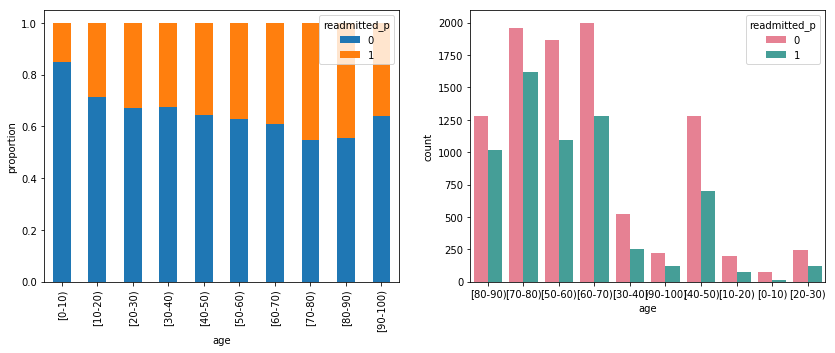

In [104]:
# For 'readmitted_p' target variable
ag = Catplots('age', 'readmitted_p', diabetes3)
ag.countplot()

Based on the similarity between the levels of 'age' categorical variable, can combine [0-10), [10,20), [20,30) & [30,40), [40,50) & [50,60) & [60,70) & [90,100), [70,80) & [80,90) to create 5 new levels.

age               [0-10)   [10-20)   [20-30)   [30-40)   [40-50)   [50-60)  \
readmitted_p30                                                               
0               0.978261  0.978182  0.944598  0.929215  0.920202  0.929777   
1               0.021739  0.021818  0.055402  0.070785  0.079798  0.070223   

age              [60-70)   [70-80)   [80-90)  [90-100)  
readmitted_p30                                          
0               0.908204  0.895886  0.897782  0.908309  
1               0.091796  0.104114  0.102218  0.091691  


(<matplotlib.axes._subplots.AxesSubplot at 0x11a208710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a4f3450>)

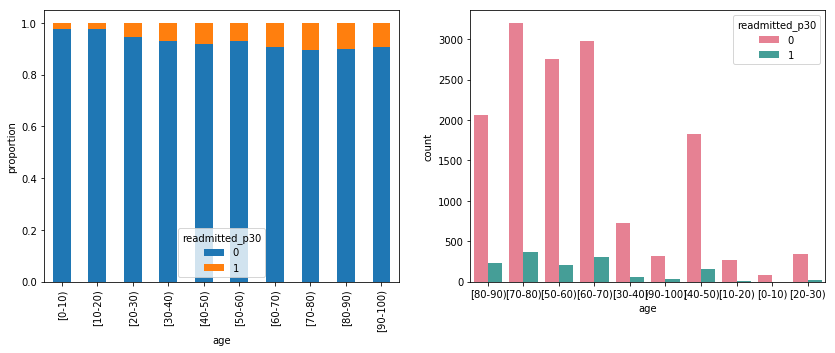

In [105]:
# For 'readmitted_p30' target variable
ag_30 = Catplots('age', 'readmitted_p30', diabetes3)
ag_30.countplot()

Based on the similarity between the levels of 'age' categorical variable, can combine [0-10) & [10,20), [20,30) & [30,40) & [40,50) & [50,60), [60,70) & [70,80) & [80,90) & [90,100) to create 3 new levels.

admission_type_id         1         2         3    4         5         6    7  \
readmitted_p                                                                    
0                  0.622665  0.623429  0.663662  1.0  0.581336  0.472131  1.0   
1                  0.377335  0.376571  0.336338  0.0  0.418664  0.527869  0.0   

admission_type_id     8  
readmitted_p             
0                  0.75  
1                  0.25  


(<matplotlib.axes._subplots.AxesSubplot at 0x11a622710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a87fc90>)

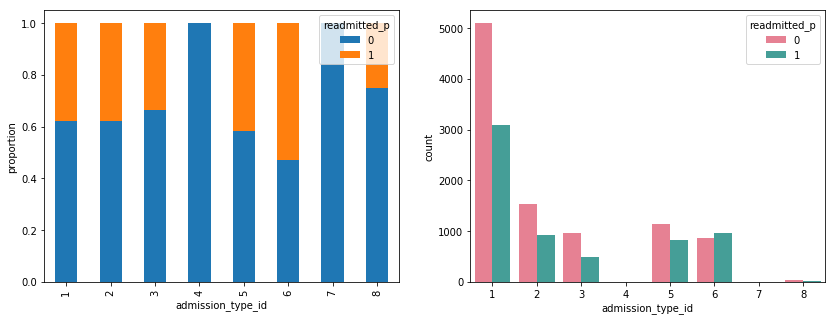

In [106]:
# For 'readmitted_p' target variable
ati = Catplots('admission_type_id', 'readmitted_p', diabetes3)
ati.countplot()

Based on the similarity between the levels of 'admission_type_id' categorical variable, can combine admission_type_ids 4 & 7, admission_type_id 8, admission_type_id 3, admission_type_ids 1&2, admission_type_id 5, admission_type_id 6 to form 6 new levels.

admission_type_id         1        2         3    4         5        6    7  \
readmitted_p30                                                                
0                  0.915252  0.91893  0.926491  1.0  0.903621  0.89235  1.0   
1                  0.084748  0.08107  0.073509  0.0  0.096379  0.10765  0.0   

admission_type_id         8  
readmitted_p30               
0                  0.942308  
1                  0.057692  


(<matplotlib.axes._subplots.AxesSubplot at 0x11a9ecb50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11abbabd0>)

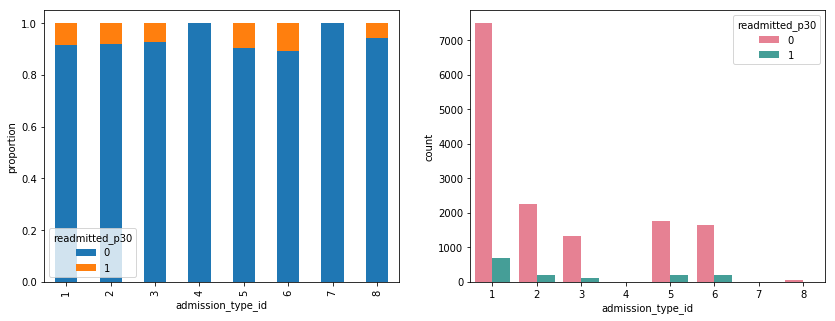

In [107]:
# For 'readmitted_p30' target variable
ati_30 = Catplots('admission_type_id', 'readmitted_p30', diabetes3)
ati_30.countplot()

Based on the similarity between the levels of 'admission_type_id' categorical variable, can combine admission_type_ids 4 & 7, admission_type_ids 8 & 3 & 2 & 1, admission_type_ids 5 & 6 to create 3 new levels.

discharge_disposition_id         1         2        3       4         5  \
readmitted_p                                                              
0                         0.632891  0.613588  0.54848  0.5875  0.520661   
1                         0.367109  0.386412  0.45152  0.4125  0.479339   

discharge_disposition_id         6         7         8    9   10   15   16  \
readmitted_p                                                                 
0                         0.537544  0.653061  0.714286  1.0  0.4  0.5  0.5   
1                         0.462456  0.346939  0.285714  0.0  0.6  0.5  0.5   

discharge_disposition_id   17        18        22        23        25  \
readmitted_p                                                            
0                         0.5  0.609544  0.524664  0.697674  0.594752   
1                         0.5  0.390456  0.475336  0.302326  0.405248   

discharge_disposition_id        28  
readmitted_p                        
0                  

(<matplotlib.axes._subplots.AxesSubplot at 0x11ad4c9d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11aedb890>)

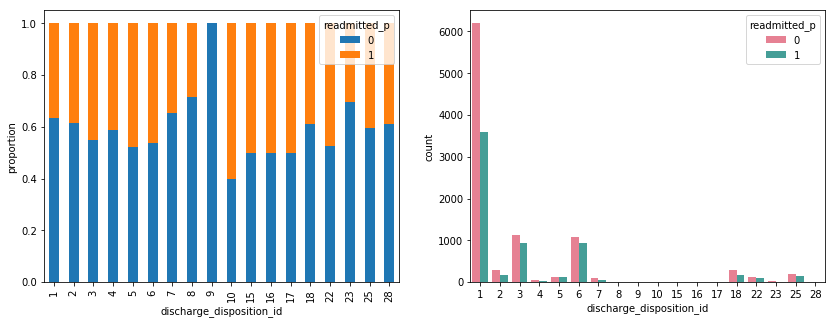

In [108]:
# For 'readmitted_p' target variable
ddi = Catplots('discharge_disposition_id', 'readmitted_p', diabetes3)
ddi.countplot()

Based on the similarity between the levels of 'discharge_disposition_id' categorical variable, can combine discharge_disposition_id 9, discharge_disposition_ids 8 & 23, discharge_disposition_ids 7 & 1 & 2 & 28, discharge_disposition_ids 18 & 25 & 4, discharge_disposition_ids 3 & 5 & 6 & 22, discharge_disposition_ids 15 & 16 & 17, discharge_disposition_id 10 to create 7 new levels.

discharge_disposition_id         1         2        3      4         5  \
readmitted_p30                                                           
0                         0.933708  0.902335  0.86493  0.875  0.793388   
1                         0.066292  0.097665  0.13507  0.125  0.206612   

discharge_disposition_id        6        7         8    9   10        15   16  \
readmitted_p30                                                                  
0                         0.90005  0.92517  0.904762  1.0  1.0  0.833333  1.0   
1                         0.09995  0.07483  0.095238  0.0  0.0  0.166667  0.0   

discharge_disposition_id   17        18        22        23        25  \
readmitted_p30                                                          
0                         1.0  0.878525  0.766816  0.976744  0.924198   
1                         0.0  0.121475  0.233184  0.023256  0.075802   

discharge_disposition_id        28  
readmitted_p30                      
0          

(<matplotlib.axes._subplots.AxesSubplot at 0x11b000410>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b34cc50>)

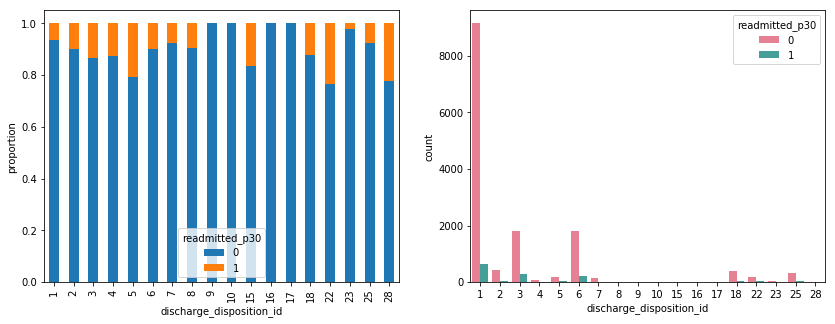

In [109]:
# For 'readmitted_p30' target variable
ddi_30 = Catplots('discharge_disposition_id', 'readmitted_p30', diabetes3)
ddi_30.countplot()

Based on the similarity between the levels of 'discharge_disposition_id' categorical variable, can combine discharge_disposition_ids 9 & 10 & 16 & 17, discharge_disposition_ids 1 & 2 & 6 & 7 & 8 & 23 & 25, discharge_disposition_ids 3 & 4 & 15 & 18, discharge_disposition_ids 5 & 22 & 28 to create 4 new levels.

admission_source_id         1         2         3         4         5  \
readmitted_p                                                            
0                    0.622167  0.478261  0.409091  0.746702  0.642857   
1                    0.377833  0.521739  0.590909  0.253298  0.357143   

admission_source_id         6         7         8         9        10   14  \
readmitted_p                                                                 
0                    0.791667  0.588739  0.666667  0.952381  0.833333  1.0   
1                    0.208333  0.411261  0.333333  0.047619  0.166667  0.0   

admission_source_id        17        20   22   25  
readmitted_p                                       
0                    0.588279  0.333333  1.0  1.0  
1                    0.411721  0.666667  0.0  0.0  


(<matplotlib.axes._subplots.AxesSubplot at 0x11b4f6a10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b7be090>)

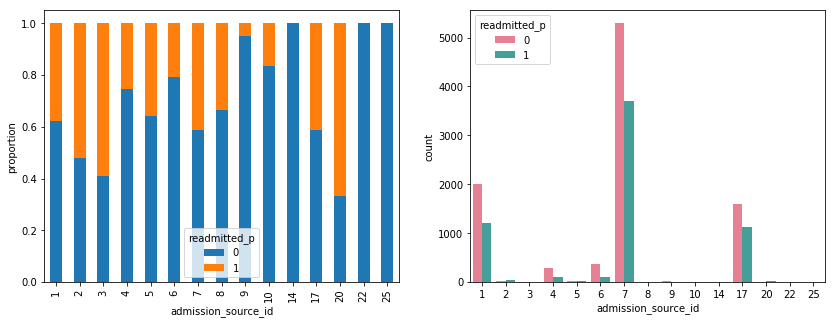

In [110]:
# For 'readmitted_p' target variable
aai = Catplots('admission_source_id', 'readmitted_p', diabetes3)
aai.countplot()

Based on the similarity between the levels of 'admission_source_id' categorical variable, can combine admission_source_ids 14 & 22 & 25, admission_source_id 9, admission_source_id 4 & 6 & 10, admission_source_ids 1 & 5 & 8, admission_source_ids 7 & 17, admission_source_ids 2 & 3 & 20 to create 6 new levels.  

admission_source_id         1         2         3         4         5  \
readmitted_p30                                                          
0                    0.915865  0.869565  0.863636  0.934037  0.857143   
1                    0.084135  0.130435  0.136364  0.065963  0.142857   

admission_source_id         6         7    8         9   10   14      17  \
readmitted_p30                                                             
0                    0.929825  0.911205  1.0  0.952381  1.0  1.0  0.9108   
1                    0.070175  0.088795  0.0  0.047619  0.0  0.0  0.0892   

admission_source_id        20   22   25  
readmitted_p30                           
0                    0.916667  1.0  1.0  
1                    0.083333  0.0  0.0  


(<matplotlib.axes._subplots.AxesSubplot at 0x11b9bfa50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11bbc7490>)

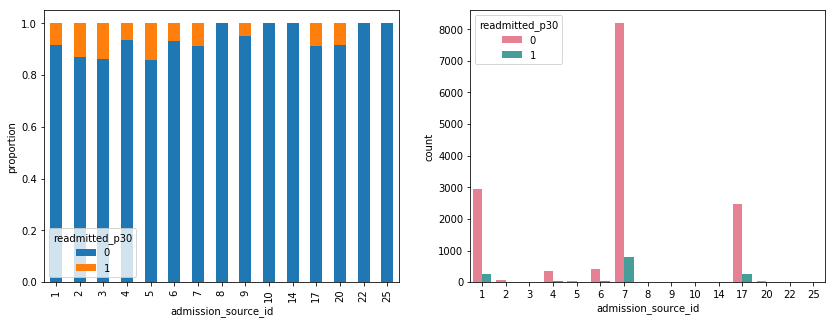

In [111]:
# For 'readmitted_p30' target variable
aai_30 = Catplots('admission_source_id', 'readmitted_p30', diabetes3)
aai_30.countplot()

Based on the similarity between the levels of 'admission_source_id' categorical variable, can combine admission_source_ids 8 & 10 & 14 & 22 & 25, 1 & 4 & 6 & 7 & 9 & 17 & 20, 2 & 3 & 5 to create 3 new levels.

There are 2 target variables, one for each aim of this project. Hence, 2 Dataframes, each containing one target variable were created. 

In [113]:
# Create 2 new DataFrames, one where the target variable is 'readmitted_p', one where the target variables is 'readmitted_p30'.
diabetes_3_p = diabetes3.copy()
diabetes_3_p = diabetes_3_p.drop('readmitted_p30', axis=1)

diabetes_3_p30 = diabetes3.copy()
diabetes_3_p30 = diabetes_3_p30.drop('readmitted_p', axis=1)

The multiple levels of the 4 categorical features 'age', 'admission_type_id', 'discharge_disposition_id' and 'admission_source_id' were combined as per the description above. This was done for both dataframes.

In [114]:
## Recoding the 4 categorical variables of diabetes_3_p30
age_0 = ['[0-10)', '[10-20)']
age_1 = ['[20-30)', '[30-40)', '[40-50)', '[50-60)']
age_2 = ['[60-70)', '[70-80)', '[80-90)', '[90-100)']
diabetes_3_p30['age'] = diabetes_3_p30['age'].apply(lambda x:'0' if x in age_0 else '1' if x in age_1 else '2')

In [115]:
admission_type_id_0 = [4,7]
admission_type_id_1 = [8,3,2,1]
admission_type_id_2 = [5,6]
diabetes_3_p30['admission_type_id'] = diabetes_3_p30['admission_type_id'].apply(lambda x: '0' if x in admission_type_id_0 else '1' if x in admission_type_id_1 else '2')

In [116]:
discharge_disposition_id_0 = [9,10,16,17]
discharge_disposition_id_1 = [1,2,6,7,8,23,25]
discharge_disposition_id_2 = [3,4,15,18]
discharge_disposition_id_3 = [5,22,28]
diabetes_3_p30['discharge_disposition_id'] = diabetes_3_p30['discharge_disposition_id'].apply(lambda x: '0' if x in discharge_disposition_id_0 else '1' if x in discharge_disposition_id_1 else '2' if x in discharge_disposition_id_2 else '3')

In [117]:
admission_source_id_0 = [8,10,14,22,25]
admission_source_id_1 = [1,4,6,7,9,17,20]
admission_source_id_2 = [2,3,5]
diabetes_3_p30['admission_source_id'] = diabetes_3_p30['admission_source_id'].apply(lambda x: '0' if x in admission_source_id_0 else '1' if x in admission_source_id_1 else '2')

In [118]:
## Recoding the 4 categorical variables of diabetes_3_p
age_0 = ['[0-10)']
age_1 = ['[10-20)']
age_2 = ['[20-30)', '[30-40)']
age_3 = ['[40-50)', '[50-60)', '[60-70)', '[90-100)']
age_4 = ['[70-80)', '[80-90)']
diabetes_3_p['age'] = diabetes_3_p['age'].apply(lambda x:'0' if x in age_0 else '1' if x in age_1 else '2' if x in age_2 else '3' if x in age_3 else '4')

In [119]:
admission_type_id_0 = [4,7]
admission_type_id_1 = [8]
admission_type_id_2 = [3]
admission_type_id_3 = [1,2]
admission_type_id_4 = [5]
admission_type_id_5 = [6]
diabetes_3_p['admission_type_id'] = diabetes_3_p['admission_type_id'].apply(lambda x: '0' if x in admission_type_id_0 else '1' if x in admission_type_id_1 else '2' if x in admission_type_id_2 else '3' if x in admission_type_id_3 else '4' if x in admission_type_id_4 else '5')

In [120]:
discharge_disposition_id_0 = [9]
discharge_disposition_id_1 = [8,23]
discharge_disposition_id_2 = [1,2,7,28]
discharge_disposition_id_3 = [4,18,25]
discharge_disposition_id_4 = [3,5,6,22]
discharge_disposition_id_5 = [15,16,17]
discharge_disposition_id_6 = [10]
diabetes_3_p['discharge_disposition_id'] = diabetes_3_p['discharge_disposition_id'].apply(lambda x: '0' if x in discharge_disposition_id_0 else '1' if x in discharge_disposition_id_1 else '2' if x in discharge_disposition_id_2 else '3' if x in discharge_disposition_id_3 else '4' if x in discharge_disposition_id_4 else '5' if x in discharge_disposition_id_5 else 6)

In [121]:
admission_source_id_0 = [14,22,25]
admission_source_id_1 = [9]
admission_source_id_2 = [4,6,10]
admission_source_id_3 = [1,5,8]
admission_source_id_4 = [7,17]
admission_source_id_5 = [2,3,20]
diabetes_3_p['admission_source_id'] = diabetes_3_p['admission_source_id'].apply(lambda x: '0' if x in admission_source_id_0 else '1' if x in admission_source_id_1 else '2' if x in admission_source_id_2 else '3' if x in admission_source_id_3 else '4' if x in admission_source_id_4 else '5')

**Summary:**
Two separate DataFrames were created, one containing the target variable 'readmitted_p' and the other containing the target variable 'readmitted_p30'. The target variable 'readmitted_p' denotes readmission vs no readmission, while the target variable 'readmitted_p30' denotes early readmission vs non-early readmission(late + no readmission).
The categorcal features 'age', 'admission_type_id', 'discharge_disposition_id' and 'admission_source_id' have many levels. Hence, EDA was done to visualise the distribution of each level of these categorical variables across the target 'readmission_p' and 'readmission_p30' variables. Levels which have a similar proportion of readmission outcomes were combined together to form new levels, thus reducing the total number of levels per categorical variable.

### Checking for Multicollinearity and Filtering--> Categorical Variables

In [122]:
diabetes_3_p.columns

Index([u'race', u'gender', u'age', u'admission_type_id',
       u'discharge_disposition_id', u'admission_source_id', u'max_glu_serum',
       u'A1Cresult', u'metformin', u'repaglinide', u'nateglinide',
       u'chlorpropamide', u'glimepiride', u'acetohexamide', u'glipizide',
       u'glyburide', u'tolbutamide', u'pioglitazone', u'rosiglitazone',
       u'acarbose', u'miglitol', u'troglitazone', u'tolazamide', u'examide',
       u'citoglipton', u'insulin', u'glyburide-metformin',
       u'glipizide-metformin', u'glimepiride-pioglitazone',
       u'metformin-rosiglitazone', u'metformin-pioglitazone', u'change',
       u'diabetesMed', u'diag_diabetes', u'readmitted_p', u'time_in_hospital',
       u'num_lab_procedures', u'num_procedures', u'number_outpatient',
       u'number_emergency', u'number_inpatient'],
      dtype='object')

In [123]:
diabetes_3_p30.columns

Index([u'race', u'gender', u'age', u'admission_type_id',
       u'discharge_disposition_id', u'admission_source_id', u'max_glu_serum',
       u'A1Cresult', u'metformin', u'repaglinide', u'nateglinide',
       u'chlorpropamide', u'glimepiride', u'acetohexamide', u'glipizide',
       u'glyburide', u'tolbutamide', u'pioglitazone', u'rosiglitazone',
       u'acarbose', u'miglitol', u'troglitazone', u'tolazamide', u'examide',
       u'citoglipton', u'insulin', u'glyburide-metformin',
       u'glipizide-metformin', u'glimepiride-pioglitazone',
       u'metformin-rosiglitazone', u'metformin-pioglitazone', u'change',
       u'diabetesMed', u'diag_diabetes', u'readmitted_p30',
       u'time_in_hospital', u'num_lab_procedures', u'num_procedures',
       u'number_outpatient', u'number_emergency', u'number_inpatient'],
      dtype='object')

Some categorical features can be rank-hot encoded while some need to get dummies(i.e one-hot encode).

The features that should be one-hot encoded are race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id.

The features that should be Rank Hot encoded are max_glu_serum, A1Cresult, change, diabetesMed, diag_diabetes and  medicines.

In [125]:
# Rank Hot encoding for DataFrame diabetes_3_p
# Rank Hot encoding previously done for diag_diabetes, medicines
diabetes_3_p['max_glu_serum'] = diabetes_3_p['max_glu_serum'].apply(lambda x: 0 if x=='None' else 1 if x=='Norm' else 2 if x=='>200' else 3)
diabetes_3_p['A1Cresult'] = diabetes_3_p['A1Cresult'].apply(lambda x: 0 if x=='None' else 1 if x=='Norm' else 2 if x=='>7' else 3)
diabetes_3_p['change'] = diabetes_3_p['change'].apply(lambda x: 0 if x=='No' else 1)
diabetes_3_p['diabetesMed'] = diabetes_3_p['diabetesMed'].apply(lambda x: 0 if x=='No' else 1)

In [126]:
# Rank Hot encoding for DataFrame diabetes_3_p30
# Rank Hot encoding previously done for diag_diabetes, medicines
diabetes_3_p30['max_glu_serum'] = diabetes_3_p30['max_glu_serum'].apply(lambda x: 0 if x=='None' else 1 if x=='Norm' else 2 if x=='>200' else 3)
diabetes_3_p30['A1Cresult'] = diabetes_3_p30['A1Cresult'].apply(lambda x: 0 if x=='None' else 1 if x=='Norm' else 2 if x=='>7' else 3)
diabetes_3_p30['change'] = diabetes_3_p30['change'].apply(lambda x: 0 if x=='No' else 1)
diabetes_3_p30['diabetesMed'] = diabetes_3_p30['diabetesMed'].apply(lambda x: 0 if x=='No' else 1)

In [127]:
# For those features that need to get dummies, change them to datatype object
# For DataFrame diabetes_3_p
diabetes_3_p['race'] = diabetes_3_p['race'].astype('object')
diabetes_3_p['gender'] = diabetes_3_p['gender'].astype('object')
diabetes_3_p['admission_type_id'] = diabetes_3_p['admission_type_id'].astype('object')
diabetes_3_p['discharge_disposition_id'] = diabetes_3_p['discharge_disposition_id'].astype('object')
diabetes_3_p['admission_source_id'] = diabetes_3_p['admission_source_id'].astype('object')
diabetes_3_p['age'] = diabetes_3_p['age'].astype('object')

# For DataFrame diabetes_3_p30
diabetes_3_p30['race'] = diabetes_3_p30['race'].astype('object')
diabetes_3_p30['gender'] = diabetes_3_p30['gender'].astype('object')
diabetes_3_p30['admission_type_id'] = diabetes_3_p30['admission_type_id'].astype('object')
diabetes_3_p30['discharge_disposition_id'] = diabetes_3_p30['discharge_disposition_id'].astype('object')
diabetes_3_p30['admission_source_id'] = diabetes_3_p30['admission_source_id'].astype('object')
diabetes_3_p30['age'] = diabetes_3_p30['age'].astype('object')

In [128]:
# Get dummies for categorical features
# The first column of each set of dummies is dropped to avoid multicollinearity
diabetes_3d_p = pd.get_dummies(diabetes_3_p, drop_first=True)
diabetes_3d_p30 = pd.get_dummies(diabetes_3_p30, drop_first=True)

Next, the categorical features with zero variance of each dataframe were dropped since they would not contribute to the prediction of the target outcome.

In [129]:
# Drop categorical features with zero_variance from DataFrame diabetes_3d_p
zeroVar, nzVar = nearZeroVariance(diabetes_3d_p)
print zeroVar
print nzVar
diabetes_3d_p.drop(zeroVar, axis=1, inplace=True)

['citoglipton', 'troglitazone', 'metformin-pioglitazone', 'acetohexamide', 'glimepiride-pioglitazone', 'examide']
['chlorpropamide', 'race_Asian', 'repaglinide', 'race_Hispanic', 'race_Other', 'admission_type_id_1', 'age_1', 'admission_source_id_1', 'miglitol', 'admission_source_id_5', 'glyburide-metformin', 'tolbutamide', 'glimepiride', 'metformin-rosiglitazone', 'discharge_disposition_id_1', 'discharge_disposition_id_0', 'discharge_disposition_id_5', 'acarbose', 'race_Unknown', 'nateglinide', 'tolazamide', 'glipizide-metformin']


In [130]:
# Drop categorical features with zero_variance from DataFrame diabetes_3d_p30
zeroVar, nzVar = nearZeroVariance(diabetes_3d_p30)
print zeroVar
print nzVar
diabetes_3d_p30.drop(zeroVar, axis=1, inplace=True)

['citoglipton', 'troglitazone', 'metformin-pioglitazone', 'acetohexamide', 'glimepiride-pioglitazone', 'examide']
['chlorpropamide', 'race_Asian', 'repaglinide', 'race_Hispanic', 'race_Other', 'admission_source_id_2', 'admission_source_id_1', 'miglitol', 'glyburide-metformin', 'tolbutamide', 'glimepiride', 'metformin-rosiglitazone', 'discharge_disposition_id_3', 'acarbose', 'race_Unknown', 'nateglinide', 'tolazamide', 'glipizide-metformin']


In [131]:
# Looking at the counts of each level of categorical variable for DataFrame diabetes_3d_p
for i in diabetes_3d_p.columns:
    print diabetes_3d_p[i].value_counts()

0    12599
1    1700 
2    936  
3    712  
Name: max_glu_serum, dtype: int64
3    6239
1    3741
0    3102
2    2865
Name: A1Cresult, dtype: int64
0    12229
1    3280 
2    438  
Name: metformin, dtype: int64
0    15713
1    201  
2    33   
Name: repaglinide, dtype: int64
0    15856
1    85   
2    6    
Name: nateglinide, dtype: int64
0    15931
1    16   
Name: chlorpropamide, dtype: int64
0    15102
1    724  
2    121  
Name: glimepiride, dtype: int64
0    13768
1    1859 
2    320  
Name: glipizide, dtype: int64
0    14119
1    1504 
2    324  
Name: glyburide, dtype: int64
0    15942
1    5    
Name: tolbutamide, dtype: int64
0    14833
1    1035 
2    79   
Name: pioglitazone, dtype: int64
0    14866
1    1014 
2    67   
Name: rosiglitazone, dtype: int64
0    15891
1    49   
2    7    
Name: acarbose, dtype: int64
0    15943
1    3    
2    1    
Name: miglitol, dtype: int64
0    15940
1    7    
Name: tolazamide, dtype: int64
0    6443
1    5038
2    4466
Name: insulin, dt

In [132]:
# Looking at the counts of each level of categorical variable for DataFrame diabetes_3d_p30
for i in diabetes_3d_p30.columns:
    print diabetes_3d_p30[i].value_counts()

0    12599
1    1700 
2    936  
3    712  
Name: max_glu_serum, dtype: int64
3    6239
1    3741
0    3102
2    2865
Name: A1Cresult, dtype: int64
0    12229
1    3280 
2    438  
Name: metformin, dtype: int64
0    15713
1    201  
2    33   
Name: repaglinide, dtype: int64
0    15856
1    85   
2    6    
Name: nateglinide, dtype: int64
0    15931
1    16   
Name: chlorpropamide, dtype: int64
0    15102
1    724  
2    121  
Name: glimepiride, dtype: int64
0    13768
1    1859 
2    320  
Name: glipizide, dtype: int64
0    14119
1    1504 
2    324  
Name: glyburide, dtype: int64
0    15942
1    5    
Name: tolbutamide, dtype: int64
0    14833
1    1035 
2    79   
Name: pioglitazone, dtype: int64
0    14866
1    1014 
2    67   
Name: rosiglitazone, dtype: int64
0    15891
1    49   
2    7    
Name: acarbose, dtype: int64
0    15943
1    3    
2    1    
Name: miglitol, dtype: int64
0    15940
1    7    
Name: tolazamide, dtype: int64
0    6443
1    5038
2    4466
Name: insulin, dt

There are a number of categorical features that contain many zero values

Summary: Categorical variables were one-hot encoded(get dummies) or rank-hot encoded. Categorical features with zero variance were removed.
There are many categorical features such as 'admission_type', 'discharge_disposition' remaining whereby the majority of the datapoints were 0.

### EDA and Feature Engineering for Categorical Variables

Based on literature research, A1Ctest and plasma glucose test are important tests for diagnosing diabetes. Hence, it was hypothesised/it is possible that a more severe test result from these 2 tests is more indicative of readmission holding all other factors constant. It will be useful to visualise the distribution of the levels of the A1Cresult and max_glu_serum across the readmission outcomes to understand the effect of the results of these 2 tests on the readmission outcome. This will better inform physicians whether they need to take certain measures to reduce readmission given a certian result on these results.

In [134]:
#Create 2 new features to see if A1c and glucose tests were conducted. 0=No, 1=Yes

Visualise the distribution of the presence and absence of A1Ctest and glucose test on the readmission outcome, for both early readmission and readmission

In [135]:
diabetes3['glucose_test'] = diabetes3['max_glu_serum'].apply(lambda x: 0 if x=='None' else 1)
diabetes3['A1c_test'] = diabetes3['A1Cresult'].apply(lambda x: 0 if x=='None' else 1)

glucose_test         0         1
readmitted_p                    
0             0.618859  0.551374
1             0.381141  0.448626


(<matplotlib.axes._subplots.AxesSubplot at 0x11bdcdf90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c844790>)

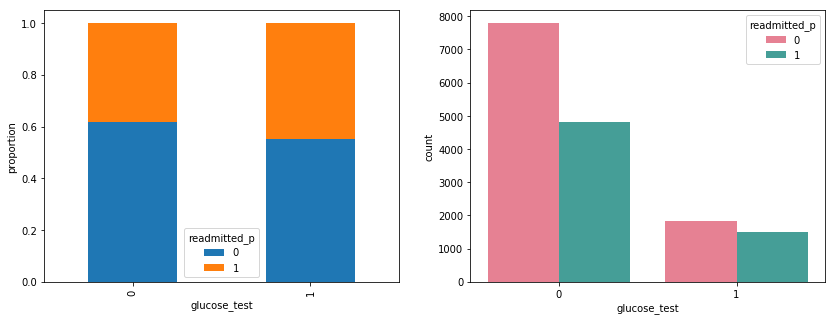

In [136]:
g = Catplots('glucose_test', 'readmitted_p', diabetes3)
g.countplot()

glucose_test           0         1
readmitted_p30                    
0               0.916739  0.898447
1               0.083261  0.101553


(<matplotlib.axes._subplots.AxesSubplot at 0x11d91cb10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11dacd150>)

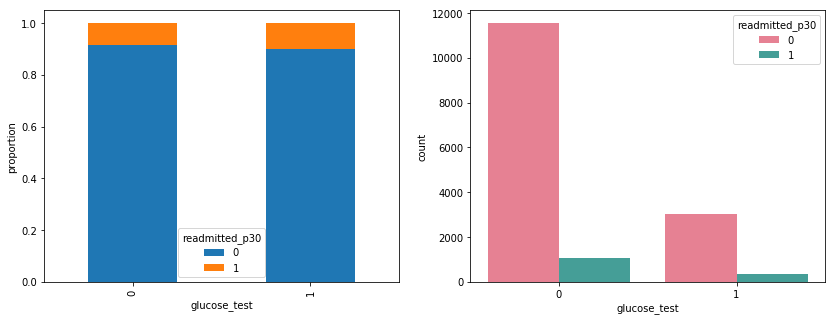

In [137]:
g_30 = Catplots('glucose_test', 'readmitted_p30', diabetes3)
g_30.countplot()

max_glu_serum      >200      >300      None      Norm
readmitted_p                                         
0              0.540598  0.501404  0.618859  0.578235
1              0.459402  0.498596  0.381141  0.421765


(<matplotlib.axes._subplots.AxesSubplot at 0x11c874690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11dd5f850>)

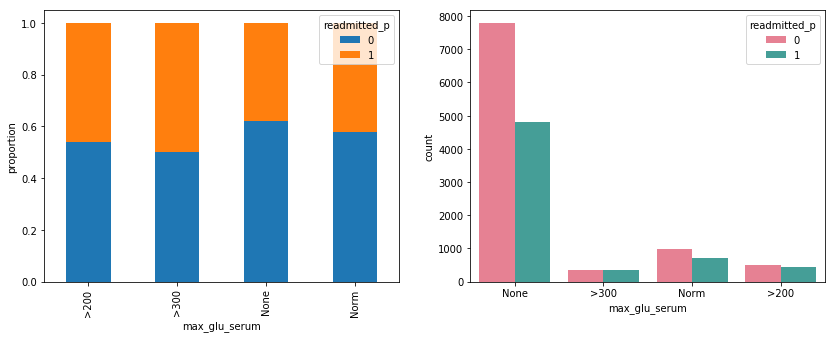

In [138]:
maxg = Catplots('max_glu_serum', 'readmitted_p', diabetes3)
maxg.countplot()

max_glu_serum       >200      >300      None      Norm
readmitted_p30                                        
0               0.891026  0.898876  0.916739  0.902353
1               0.108974  0.101124  0.083261  0.097647


(<matplotlib.axes._subplots.AxesSubplot at 0x11de186d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11e081c90>)

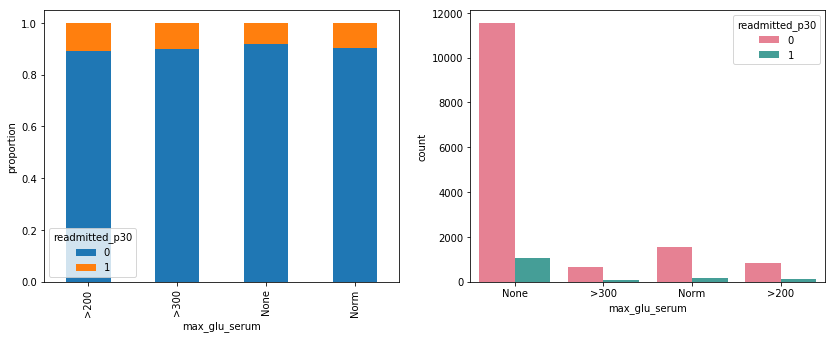

In [139]:
maxg_30 = Catplots('max_glu_serum', 'readmitted_p30', diabetes3)
maxg_30.countplot()

A quick recap: The ratio of non-readmission to readmission is 6:4. The ratio of non-early readmission to early readmission is 0.913:0.0871.

A greater proportion of patients who took the glucose_test were readmitted as compared to those who did not take the test. As the levels of the glucose_test results increase, i.e. greater severity of results (from 'Norm' to '>200' to '>300'), the proportion of readmission increases. A result of '>200' and '>300' are both indicative of diabetes, with '>300' being more severe. The proportion of readmission is higher than the baseline of 0.4 when the glucose test was taken.

Looking at the readmitted class distribution of glucose_test, a slightly greater proportion of those who took the glucose test were readmitted within 30 days (early readmission, class 1) as compared to those who did not take the test. The proportion of early readmission is higher than the baseline of 0.0871 when the glucose test was taken. When the glucose test was taken, the proportion of early readmission was higher for the level '>200' and '>300' (in 'max_glu_serum') as compared to Normal results(indicated by Norm in 'max_glu_serum'). 

An increase in the early readmission when the test was taken indicates that taking the glucose test could be a stronger driver of early readmission and readmission in general. However, that does not meant that taking a glucose test, regardless of the result, increases early readmission and readmission rate since the aim of a test is to diagnose a patient in order to take measures that ultimately reduces early readmission and readmission rate. This phenomenon of increase in early readmission and readmission with the increase in the levels of max_glu_serum could be due to interaction with other categorical features. Check for interaction between 'max_glu_serum' and ['A1Cresult', 'change', 'gender', 'diabetesMed', 'diag_diabetes']. Check to see if as the levels of 'max_glu_serum' changes, the levels of these other variables change too to affect the readmission outcome.

This change in the readmission outcome across the levels of 'max_glu_serum' indicates that this feature is a good feature for distinguishing the different readmission outcomes.

A1c_test             0         1
readmitted_p                    
0             0.559961  0.615492
1             0.440039  0.384508


(<matplotlib.axes._subplots.AxesSubplot at 0x11df19a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11e368350>)

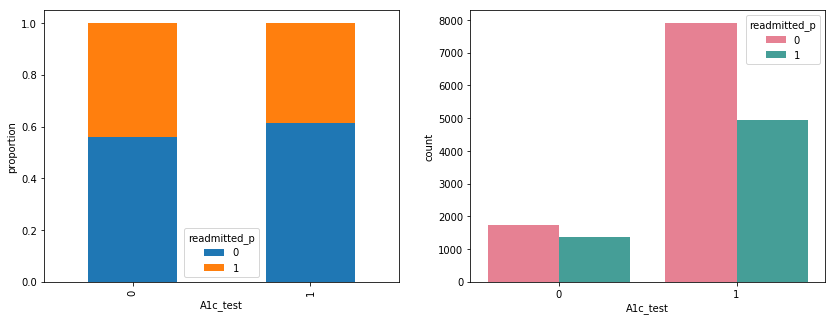

In [140]:
a = Catplots('A1c_test', 'readmitted_p', diabetes3)
a.countplot()

A1c_test               0         1
readmitted_p30                    
0               0.899742  0.916076
1               0.100258  0.083924


(<matplotlib.axes._subplots.AxesSubplot at 0x11e46d650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11e609890>)

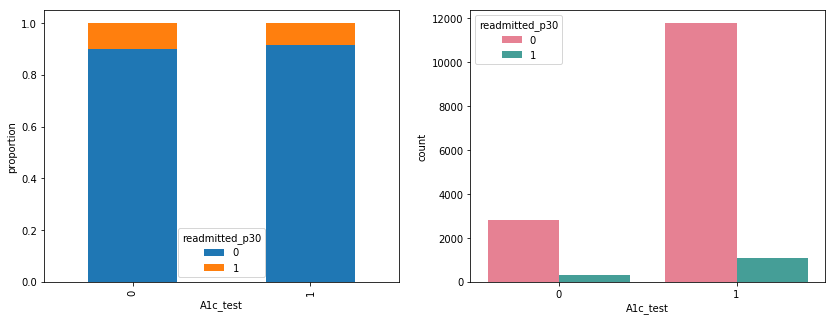

In [141]:
a_30 = Catplots('A1c_test', 'readmitted_p30', diabetes3)
a_30.countplot()

A1Cresult           >7        >8      None      Norm
readmitted_p                                        
0             0.613264  0.604264  0.559961  0.635926
1             0.386736  0.395736  0.440039  0.364074


(<matplotlib.axes._subplots.AxesSubplot at 0x11e6b1690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11e8ad050>)

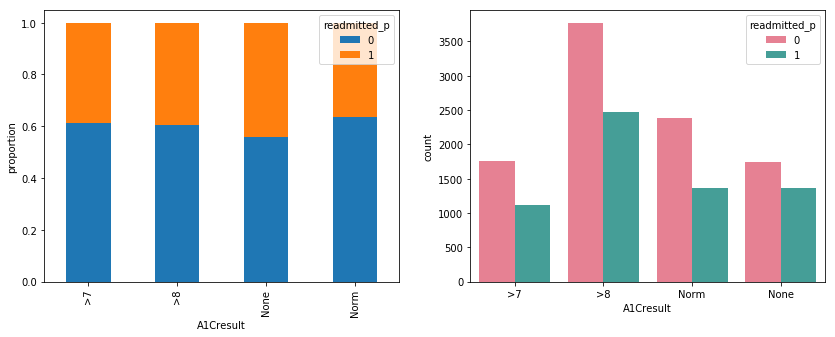

In [142]:
ar = Catplots('A1Cresult', 'readmitted_p', diabetes3)
ar.countplot()

A1Cresult             >7        >8      None      Norm
readmitted_p30                                        
0               0.914136  0.918416  0.899742  0.913659
1               0.085864  0.081584  0.100258  0.086341


(<matplotlib.axes._subplots.AxesSubplot at 0x11e957410>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11eb84e10>)

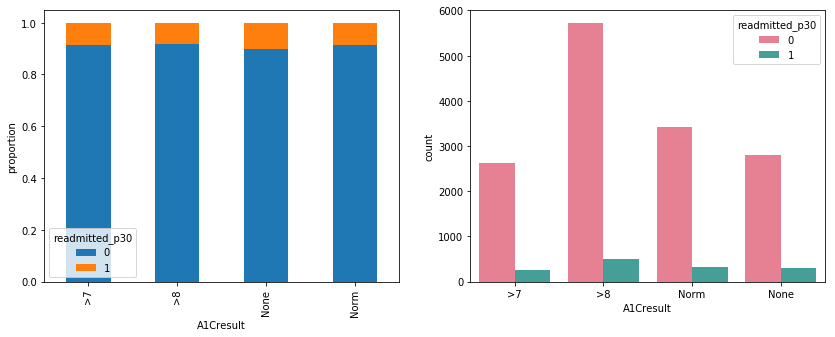

In [143]:
ar_30 = Catplots('A1Cresult', 'readmitted_p30', diabetes3)
ar_30.countplot()

The levels of 'A1Cresult' are 'None', 'Norm', '>7' and '>8'. A A1C test result of >6.5 is indicative of diabetes. Hence, both '>7' and '>8' are indication of diabetes, with '>8' being more severe.

Looking at the readmitted class distribution of A1Cresult and A1Ctest, the proportion of readmission is slightly lower when the A1C test is done, regardless of the result of the test. The proportion of readmission when the test is done is lower than the baseline proportion of 0.4. The level 'None' has the greatest readmission while the level 'Norm' has the lowest readmission. Hence, taking this test could reduce the readmission rate of a patient.

Looking at the readmitted class distribution of A1Cresult and A1Ctest, the proportion of early readmission is slightly lower when the A1c test is done, regardless of the result of the test. The proportion of early readmission when the test is done is lower than the baseline proportion of 0.0871. As the levels of 'A1Cresult' increases from 'None' to 'Norm' to '>7' to '>8', the proportion of early readmission decreases. Hence, taking this test could reduce the early readmission rate of a patient, especially at higher levels(greater severity) of the test result.

There is a chance that this decrease in early readmission with the taking of A1C test could be due to interaction with other categorical features. Check for interaction between 'A1Cresult' and ['max_glu_serum', 'change', 'gender', 'diabetesMed', 'diag_diabetes']. Check to see if as the levels of 'A1Ctest' changes, the levels of these other variables change too to affect the readmission outcome. 

This change in the readmission outcome across the levels of 'A1Ctest' indicates that this feature is a good feature for distinguishing between the different readmission outcomes. Not taking the test is a stronger driver of readmission and early readmission.

**Interacting variables**

First, plot the count and proportion plots of the other complete categorical features (rank hot-encoded). These categorical features are 'change', 'diabetesMed', 'gender' and 'diag_diabetes'. Then check to see if they interact with A1Cresult or max_glu_serum to affect the readmission outcome.

change              Ch        No
readmitted_p                    
0             0.585032  0.626522
1             0.414968  0.373478


(<matplotlib.axes._subplots.AxesSubplot at 0x11ec46350>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ee67510>)

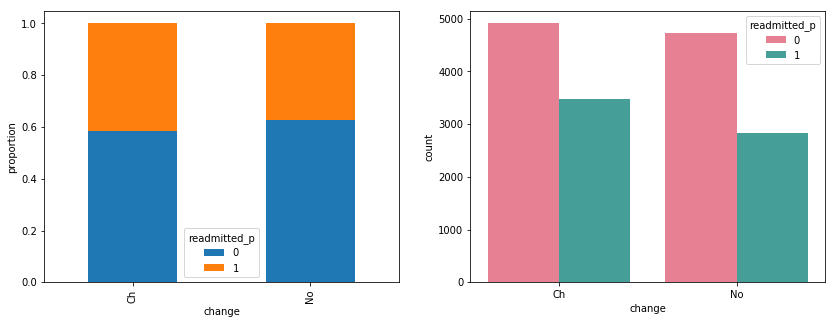

In [144]:
ch = Catplots('change', 'readmitted_p', diabetes3)
ch.countplot()

change                Ch        No
readmitted_p30                    
0               0.912287  0.913579
1               0.087713  0.086421


(<matplotlib.axes._subplots.AxesSubplot at 0x11e6fe290>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f0baf10>)

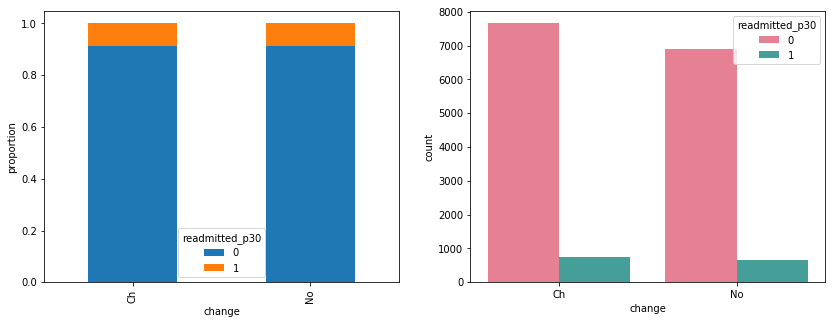

In [145]:
ch_30 = Catplots('change', 'readmitted_p30', diabetes3)
ch_30.countplot()

The feature 'change' indicates whether there was a change in medications during the hospitalisation.
The proportion of readmission is slightly greater when there is a change in medications(greater than the baseline of 0.4) vs no change.
The proportion of early readmission across the levels of 'change' is roughly constant and follows the baseline proportion of 0.0871. 

gender          Female      Male
readmitted_p                    
0             0.588329  0.621896
1             0.411671  0.378104


(<matplotlib.axes._subplots.AxesSubplot at 0x11f1c8550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f35fc90>)

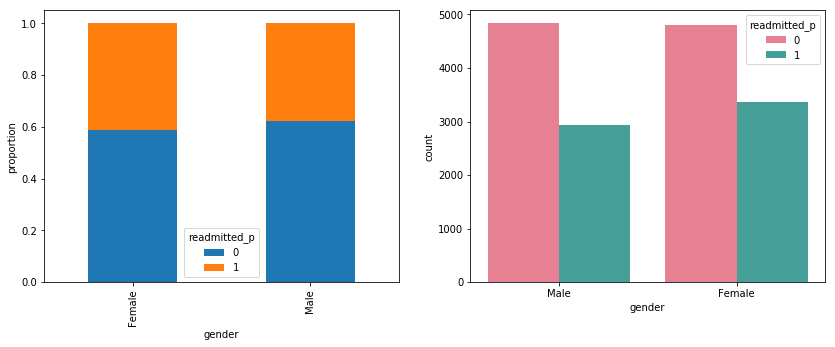

In [146]:
ge = Catplots('gender', 'readmitted_p', diabetes3)
ge.countplot()

gender            Female      Male
readmitted_p30                    
0               0.913262  0.912518
1               0.086738  0.087482


(<matplotlib.axes._subplots.AxesSubplot at 0x11f411510>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f616590>)

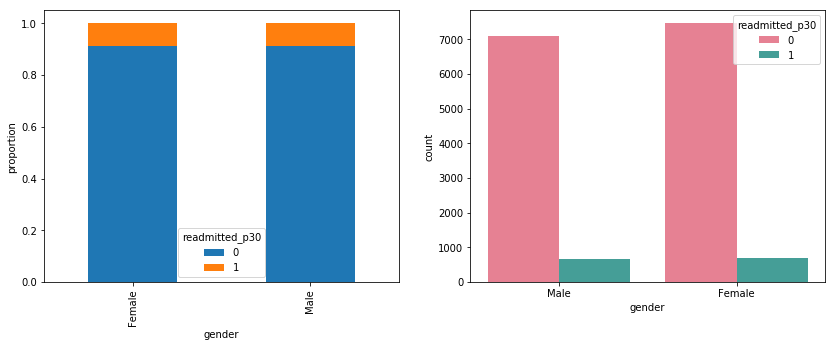

In [147]:
ge_30 = Catplots('gender', 'readmitted_p30', diabetes3)
ge_30.countplot()

The proportion of readmission is slightly higher among females(greater than baseline of 0.4) than males.

The proportion of early readmission across the levels of 'gender' is roughly constant and follows the baseline proportion of 0.0871.

diag_diabetes         0         1         2         3         4         5    6
readmitted_p                                                                  
0              0.592601  0.609952  0.630612  0.618539  0.511111  0.434783  0.0
1              0.407399  0.390048  0.369388  0.381461  0.488889  0.565217  1.0


(<matplotlib.axes._subplots.AxesSubplot at 0x11f4a3590>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11f8cf410>)

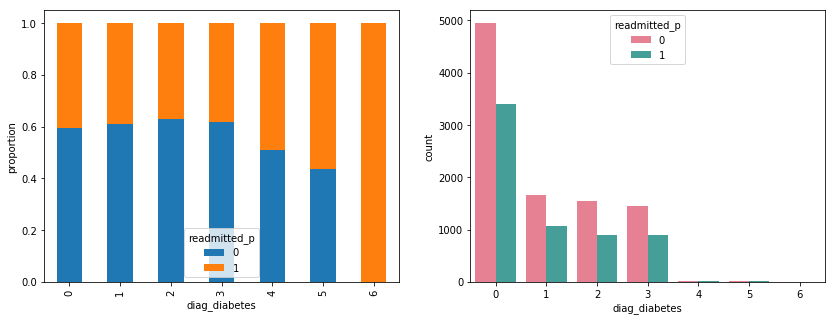

In [148]:
dd = Catplots('diag_diabetes', 'readmitted_p', diabetes3)
dd.countplot()

diag_diabetes          0         1         2         3         4         5  \
readmitted_p30                                                               
0               0.908775  0.911819  0.922857  0.920547  0.822222  0.913043   
1               0.091225  0.088181  0.077143  0.079453  0.177778  0.086957   

diag_diabetes     6  
readmitted_p30       
0               0.5  
1               0.5  


(<matplotlib.axes._subplots.AxesSubplot at 0x11fa68050>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11fbe5b90>)

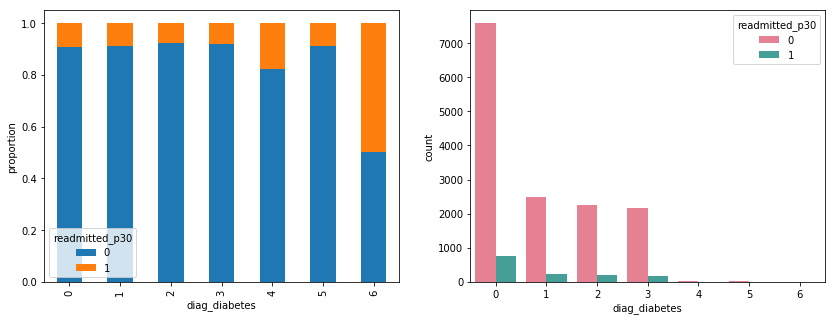

In [149]:
dd_30 = Catplots('diag_diabetes', 'readmitted_p30', diabetes3)
dd_30.countplot()

The 'diag_diabetes' feature indicates the nature of diagnosis of diabetes. Diabetes can be diagnosed as a primary, secondary or tertiary disease. A score of 0 is mapped to no diagnosis of diabetes, a score of 1 is mapped to tertiary diagnosis of diabetes, a score of 2 is mapped to secondary diagnosis of diabetes, and a score of 3 is mapped to primary diagnosis of diabetes. All these scores for a patient are added up together to give the diag_diabetes feature. Hence a higher number on diag_diabetes indicates that the patient received multiple or a primary diabetes diagnosis as compared to a secondary/tertiary diabetes diagnosis. 

From the plots above, a greater proportion of patients who received any diagnosis of diabetes were readmitted as compared to no diagnosis of diabetes. As compared to patients without any diagnosis of diabetes, a diag_diabetes score of 2 or 3 is associated with lower readmission. As compared to patients without any diagnosis of diabetes, a high diag_diabetes score of 4, 5 or 6 is associated with greater early readmission, with a higher score having a greater proportion of readmission, indicating that a higher diag_diabetes score is a strong driver of early readmission.

From the plots above, a greater proportion of patients who received any diagnosis of diabetes were readmitted early as compared to no diagnosis of diabetes. As compared to patients without any diagnosis of diabetes, a diag_diabetes score of 2 or 3 is associated with lower early readmission. As compared to patients without any diagnosis of diabetes, a high diag_diabetes score of 4 or 6 is associated with greater early readmission, indicating that a high diag_diabetes score is a strong driver of early readmission.

diabetesMed         No       Yes
readmitted_p                    
0             0.649163  0.594186
1             0.350837  0.405814


(<matplotlib.axes._subplots.AxesSubplot at 0x11fd15790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ff0be50>)

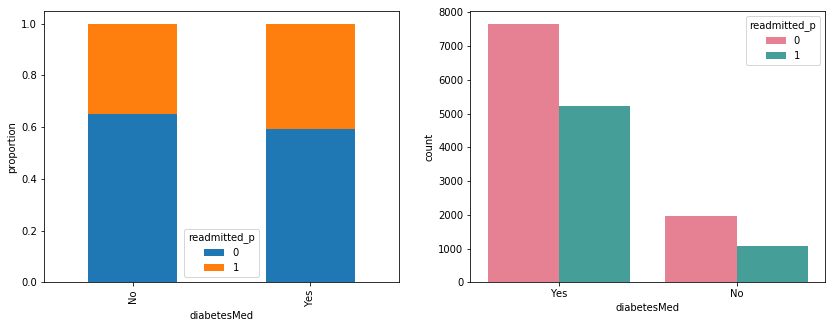

In [150]:
dm = Catplots('diabetesMed', 'readmitted_p', diabetes3)
dm.countplot()

diabetesMed           No       Yes
readmitted_p30                    
0               0.924516  0.910155
1               0.075484  0.089845


(<matplotlib.axes._subplots.AxesSubplot at 0x120019290>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1201bf450>)

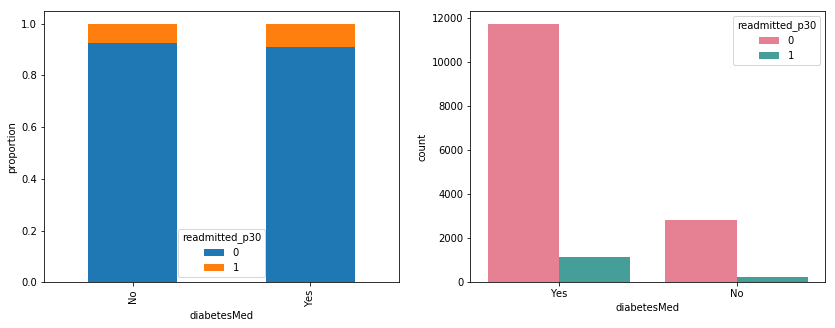

In [151]:
dm_30 = Catplots('diabetesMed', 'readmitted_p30', diabetes3)
dm_30.countplot()

The 'diabetesMed' feature indicates whether diabetes medicines were prescribed during the visit (Yes or No). The proportion of readmission is reduced (lower than the baseline of 0.4) when medicines were not prescribed whereas the proportion of readmission is preserved when medicines were prescribed. The proportion of early readmission is reduced (lower than the baseline of 0.0871) when medicines were not prescribed whereas the proportion of early distribution is preserved when medicines were prescribed. This decrease could be due to interaction with other categorical variables.

**Checking for Interaction between categorical variables to create new interaction features (Feature Engineering):**
The interaction between selected pairs categorical variables were checked. Interaction is indicated by the crossing of the lines corresponding to the different levels of the pairs of the interacting variables.

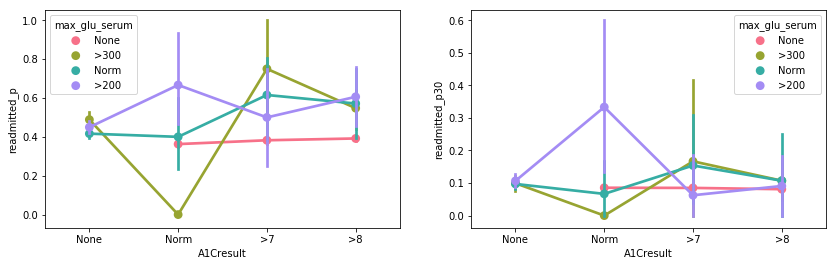

In [152]:
# Checking for interaction between categorical variables
from statsmodels.graphics.factorplots import interaction_plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(x='A1Cresult', hue='max_glu_serum', y='readmitted_p', data=diabetes3, palette='husl', order=['None','Norm','>7','>8'], ax=ax1)
sns.pointplot(x='A1Cresult', hue='max_glu_serum', y='readmitted_p30', data=diabetes3, palette='husl', order=['None','Norm','>7','>8'], ax=ax2)

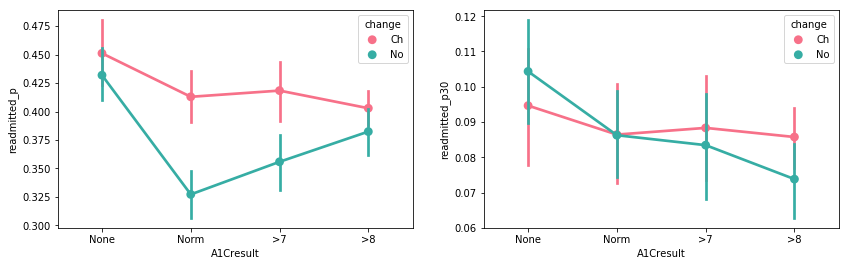

In [153]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(x='A1Cresult', hue='change', y='readmitted_p', data=diabetes3, palette='husl', order=['None','Norm','>7','>8'], ax=ax1)
sns.pointplot(x='A1Cresult', hue='change', y='readmitted_p30', data=diabetes3, palette='husl', order=['None','Norm','>7','>8'], ax=ax2)

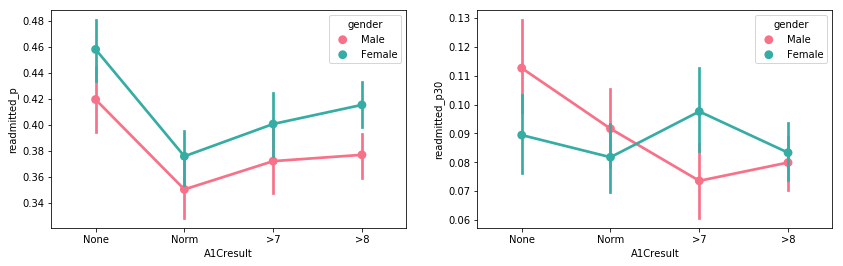

In [154]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(x='A1Cresult', hue='gender', y='readmitted_p', data=diabetes3, palette='husl', order=['None','Norm','>7','>8'], ax=ax1)
sns.pointplot(x='A1Cresult', hue='gender', y='readmitted_p30', data=diabetes3, palette='husl', order=['None','Norm','>7','>8'], ax=ax2)

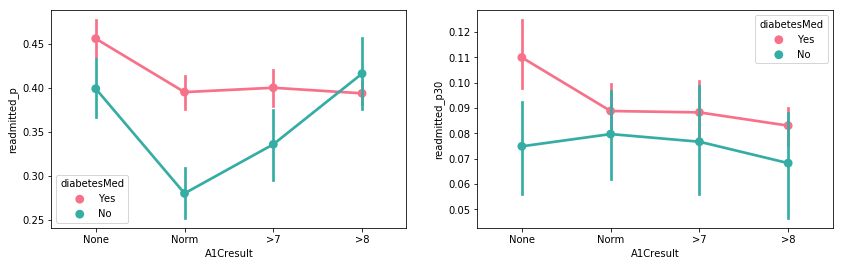

In [155]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(x='A1Cresult', hue='diabetesMed', y='readmitted_p', data=diabetes3, palette='husl', order=['None','Norm','>7','>8'], ax=ax1)
sns.pointplot(x='A1Cresult', hue='diabetesMed', y='readmitted_p30', data=diabetes3, palette='husl', order=['None','Norm','>7','>8'], ax=ax2)

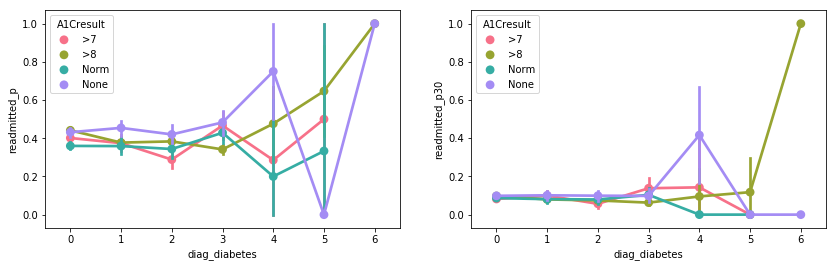

In [156]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(hue='A1Cresult', x='diag_diabetes', y='readmitted_p', data=diabetes3, palette='husl', ax=ax1)
sns.pointplot(hue='A1Cresult', x='diag_diabetes', y='readmitted_p30', data=diabetes3, palette='husl', ax=ax2)

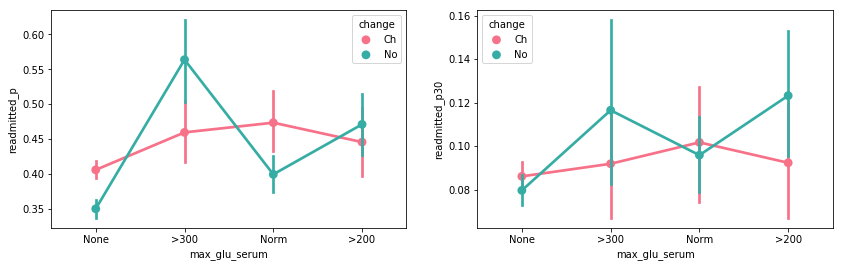

In [157]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(x='max_glu_serum', hue='change', y='readmitted_p', data=diabetes3, palette='husl', ax=ax1)
sns.pointplot(x='max_glu_serum', hue='change', y='readmitted_p30', data=diabetes3, palette='husl', ax=ax2)

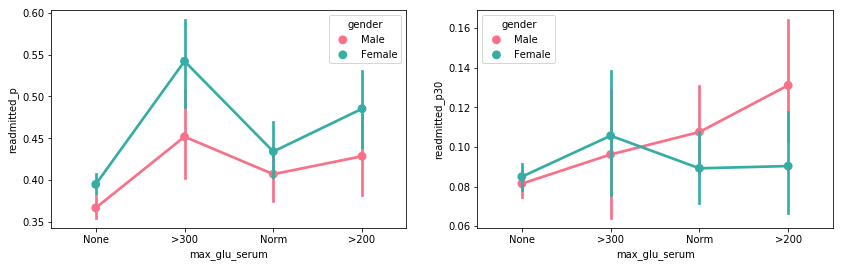

In [158]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(x='max_glu_serum', hue='gender', y='readmitted_p', data=diabetes3, palette='husl', ax=ax1)
sns.pointplot(x='max_glu_serum', hue='gender', y='readmitted_p30', data=diabetes3, palette='husl', ax=ax2)

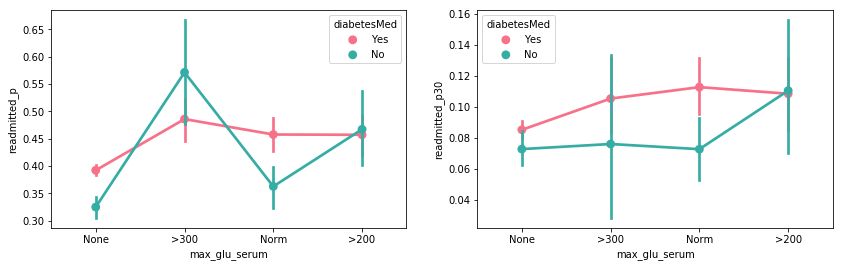

In [159]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(x='max_glu_serum', hue='diabetesMed', y='readmitted_p', data=diabetes3, palette='husl', ax=ax1)
sns.pointplot(x='max_glu_serum', hue='diabetesMed', y='readmitted_p30', data=diabetes3, palette='husl', ax=ax2)

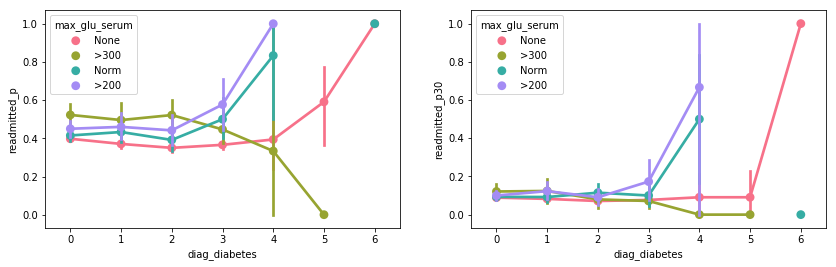

In [160]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
sns.pointplot(hue='max_glu_serum', x='diag_diabetes', y='readmitted_p', data=diabetes3, palette='husl', ax=ax1)
sns.pointplot(hue='max_glu_serum', x='diag_diabetes', y='readmitted_p30', data=diabetes3, palette='husl', ax=ax2)

Interaction is indicated by the crossing of the lines corresponding to the different levels of the pairs of the interacting variables. The error bars indicate the 95% confidence interval.

Based on the plots above, there seems to be an interaction between 'A1Cresult' & 'max-glu_serum', 'A1Cresult' & 'change', 'A1Cresult' & 'gender', 'A1Cresult' & 'diabetesMed', 'A1Cresult' & 'diag_diabetes', 'max_glu_serum' & 'change', 'max_glu_serum' & 'gender', 'max_glu_serum' & 'diabetesMed', 'max_glu_serum' & 'diag_diabetes'. Hence create 9 new interacing variables using these 9 pairs of variables and append to the 2 different DataFrames.

In [161]:
#Creating new interacting variables
lst = [('A1Cresult','max_glu_serum'), ('A1Cresult','change'), ('A1Cresult','gender_Male'), ('A1Cresult','diag_diabetes'), ('A1Cresult','diabetesMed'), ('max_glu_serum','change'), ('max_glu_serum','gender_Male'), ('max_glu_serum','diag_diabetes'), ('max_glu_serum','diabetesMed')]
for i,j in lst:
    name = i+'&'+j
    diabetes_3d_p[name] = diabetes_3d_p[i] * diabetes_3d_p[j]
    diabetes_3d_p30[name] = diabetes_3d_p30[i] * diabetes_3d_p30[j]

Summary:

Based on literature research, A1Ctest and plasma glucose test are important tests for diagnosing diabetes. 2 new features 'A1Ctest' and 'glucose_test' were created to see if these tests were carried out and to check the class distribution of the having taken the test vs not having taken the test. Countplots and proportion plots indicated that the taking of 'glucose_test' was associated with a greater proportion of early readmission and readmission while the taking of 'A1Ctest' is associated with a reduced proportion of early readmission and readmission. When the 'glucose_test' was taken, a higher plasma glucose was associated with greater early readmission and readmission. When the 'A1Ctest'was taken, a higher level of 'A1Cresult' was associated with lower early readmission. This change in the proportion of readmission and early readmission with changes in the levels of the 'max_glu_serum' and 'A1Cresult' could be due to interaction with other features. One interesting thing to note is that the readmission outcomes for these 2 glucose tests disagree with each other where taking 'glucose_test' is associated with greater readmissions while taking 'A1Ctest' is associated with lower readmissions. 

Proportion plots of some other categorical features were done to visualise the target class distribution of these features. The target class distributions of 'change', 'gender', diabetesMed' and 'diag_diabetes' varied depending on the levels of the categorical variables. Hence, the interaction between these categorical features and 'max_glu_serum' and 'A1Cresult' were checked.

The interaction between 'max_glu_serum' and 'A1Cresult' with other selected categorical features was checked using interaction plots. An interaction between 2 categorical features occurs when the proportion of the readmission outcome across the levels of one categorical variable differs based on the levels of another categorical variable. The crossing of the lines in the interaction plots indicate that the 2 features interact with each other to influence the readmission outcome. Based on the interaction plots, there is an interaction between the categorical features 'A1Cresult' & 'max-glu_serum', 'A1Cresult' & 'change', 'A1Cresult' & 'gender', 'A1Cresult' & 'diabetesMed', 'A1Cresult' & 'diag_diabetes', 'max_glu_serum' & 'change', 'max_glu_serum' & 'gender', 'max_glu_serum' & 'diabetesMed', 'max_glu_serum' & 'diag_diabetes' in influencing the readmission outcome, for both readmission and early readmission. These interacting variables were multiplied together and added to the 2 dataframes to be used for modeling later. 

### Creating a csv file

Creating a CSV file containing the cleaned dataframe containing the new engineered features (interacting variables).

In [268]:
#diabetes_3d_p.to_csv('diabetes_3d_p.csv', columns=list(diabetes_3d_p.columns), index=list(diabetes_3d_p.index), encoding='utf8')
#diabetes_3d_p30.to_csv('diabetes_3d_p30.csv', columns=list(diabetes_3d_p30.columns), index=list(diabetes_3d_p30.index), encoding='utf8')

### Looking at Class Distribution

In [163]:
#Finding out the class distribution of target variable 'readmitted_p'
ratio = diabetes_3d_p['readmitted_p'].value_counts()
ratio_0 = float(ratio[0])/(ratio[0]+ratio[1])
ratio_1 = float(ratio[1])/(ratio[0]+ratio[1])
print 'Class 0 ratio:', ratio_0
print 'Class 1 ratio:', ratio_1

Class 0 ratio: 0.604690537405
Class 1 ratio: 0.395309462595


In [164]:
#Baseline accuracy for target variable 'readmitted_p'
base_acc = ratio_0/(ratio_0 + ratio_1)
base_acc

0.6046905374051545

In [165]:
#Finding out the class distribution of target variable 'readmitted_p30'
ratio = diabetes_3d_p30['readmitted_p30'].value_counts()
ratio_0 = float(ratio[0])/(ratio[0]+ratio[1])
ratio_1 = float(ratio[1])/(ratio[0]+ratio[1])
print 'Class 0 ratio:', ratio_0
print 'Class 1 ratio:', ratio_1

Class 0 ratio: 0.912898977864
Class 1 ratio: 0.0871010221358


In [166]:
#Baseline accuracy for target variable 'readmitted_p'
base_acc = ratio_0/(ratio_0 + ratio_1)
base_acc

0.9128989778641751

Summary:
Looking at the class distibution of the target variables, readmission_p and readmission_p30, it is evident that there is class imbalance. For a dataset that is properly balanced, the ratio of each class sould be approximately equal, i.e. 0.5. So need to undersample class 0 and oversample class 1 to follow same ratio of 0.5 each for both dataframes. The reason for balancing the ratio of the 2 classes before fitting a classifier is that a balanced ratio of the 2 different classes optimises the classifier's ability to classify the 2 different classes better. Else, the classifier will predict the majority class better than the minority class.

### Train-Test-Split and Oversampling with SMOTEENN

SMOTEENN was used for oversampling the minority class. The majority class was not undersampled.

In [196]:
# SMOTEENN for Oversampling
# Do for target variable 'readmission_p' first

In [197]:
# Getting a Dataframe containg only the predictor features
predictor_cols = [i for i in diabetes_3d_p.columns if i != 'readmitted_p']
predictors = diabetes_3d_p.loc[:, predictor_cols]
target = diabetes_3d_p.loc[:,'readmitted_p']

In [198]:
from sklearn.model_selection import train_test_split
#Get the training and test sets, ratio is 7:3, fit df with interaction terms
X_train, X_test, y_train, y_test = train_test_split(predictors, target, train_size=0.7, test_size=0.3, stratify=target, random_state=12)

In [199]:
#count of each class for training set
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
print num_zeros
print num_ones

6750
4412


In [200]:
#Do oversampling using SMOTEENN --> just oversample minority clas without undersample maj class
from imblearn.combine import SMOTEENN
sme = SMOTEENN(ratio={0:12000, 1:11200}, random_state=12)
X_ros, y_ros = sme.fit_sample(X_train, y_train)

In [202]:
#count of each class
num_zeros = (y_ros == 0).sum()
num_ones = (y_ros == 1).sum()
print num_zeros
print num_ones

6860
6805


After oversampling with SMOTEENN, the ratio of each class is the same.

In [203]:
# Create csv files of the training sets, the test sets, and the oversampled training sets
X_train.to_csv('X_train.csv', columns=predictor_cols, encoding='utf8')
X_test.to_csv('X_test.csv', columns=predictor_cols, encoding='utf8')

In [204]:
y__train = pd.DataFrame(y_train, columns=['readmitted_p'])
y__test = pd.DataFrame(y_test, columns=['readmitted_p'])

In [205]:
y__train.to_csv('y_train.csv', columns=['readmitted_p'], encoding='utf8')
y__test.to_csv('y_test.csv', columns=['readmitted_p'], encoding='utf8')

In [206]:
X__ros = pd.DataFrame(X_ros, columns=predictor_cols)
y_ros = pd.DataFrame(y_ros, columns=['readmitted_p'])

In [210]:
X__ros.to_csv('X_ros.csv', columns=predictor_cols, encoding='utf8')
y_ros.to_csv('y_ros.csv', columns=['readmitted_p'], encoding='utf8')

Summary:
Train_test split was done using a 7:3 ratio on the diabetes_3_p DataFrame. The training set was oversampled using SMOTEENN from the imblearn library. In SMOTEENN, oversampling of the minority class is done using SMOTE where new entries(datapoints) are created using interpolations of the minority class. Then  datapoints from each of the classes that overlap with the other classes is removed using ENN(Edited Nearest Neighbors). The collective effect of SMOTEENN is that it creates balanced classes that are separated from each other in n-dimensional space.

The training, test and oversampled training sets were saved as csv files that can be used for modeling later. Modeling is done in a separate notebook.

In [297]:
# SMOTEENN for Oversampling--> ratio 0.5:0.5
# Do for target variable 'readmission_p30' second

In [178]:
# Getting a Dataframe containg only the predictor features
predictor_cols_30 = [i for i in diabetes_3d_p30.columns if i != 'readmitted_p30']
predictors_30 = diabetes_3d_p30.loc[:, predictor_cols_30]
target_30 = diabetes_3d_p30.loc[:,'readmitted_p30']

In [179]:
#Get the training and test sets, ratio is 7:3, fit df with interaction terms
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(predictors_30, target_30, train_size=0.7, test_size=0.3, stratify=target_30, random_state=12)

In [180]:
#count of each class for training set
num_zeros = (y_train_30 == 0).sum()
num_ones = (y_train_30 == 1).sum()
print num_zeros
print num_ones

10190
972


There is a huge class imbalance.

In [181]:
#Do oversampling using SMOTEENN --> just oversample minority clas without undersample maj class
sme = SMOTEENN(ratio={0:13500, 1:11200}, random_state=12)
X_ros_30, y_ros_30 = sme.fit_sample(X_train_30, y_train_30)

In [182]:
#count of each class for training set
num_zeros = (y_ros_30 == 0).sum()
num_ones = (y_ros_30 == 1).sum()
print num_zeros
print num_ones

10349
10248


After oversampling with SMOTEENN, the ratio of each class is the same.

In [189]:
# Create csv files of the training sets, the test sets, and the oversampled training sets
X_train_30.to_csv('X_train_30.csv', columns=predictor_cols_30, encoding='utf8')
X_test_30.to_csv('X_test_30.csv', columns=predictor_cols_30, encoding='utf8')

In [190]:
y__train_30 = pd.DataFrame(y_train_30, columns=['readmitted_p30'])
y__test_30 = pd.DataFrame(y_test_30, columns=['readmitted_p30'])

In [191]:
y__train_30.to_csv('y_train_30.csv', columns=['readmitted_p30'], encoding='utf8')
y__test_30.to_csv('y_test_30.csv', columns=['readmitted_p30'], encoding='utf8')

In [192]:
X__ros_30 = pd.DataFrame(X_ros_30, columns=predictor_cols_30)
y_ros_30 = pd.DataFrame(y_ros_30, columns=['readmitted_p30'])

In [193]:
X__ros_30.to_csv('X_ros_30.csv', columns=predictor_cols_30, encoding='utf8')
y_ros_30.to_csv('y_ros_30.csv', columns=['readmitted_p30'], encoding='utf8')

Summary:
Train_test split was done using a 7:3 ratio on the diabetes_3_p DataFrame. The training set was oversampled using SMOTEENN from the imblearn library. In SMOTEENN, oversampling of the minority class is done using SMOTE where new entries(datapoints) are created using interpolations of the minority class. Then  datapoints from each of the classes that overlap with the other classes is removed using ENN(Edited Nearest Neighbors). The collective effect of SMOTEENN is that it creates balanced classes that are separated from each other in n-dimensional space. The training, test and oversampled training sets were saved as csv files that can be used for modeling later.

The modeling for the dataframes was done in separate notebooks. The notebook titled 'Capstone---Models for Readmission vs No Readmission.ipynb' contains the models for predicting readmission vs no-readmission, while the notebook titled 'Capstone---Models for Early Readmission vs Non-Early Readmission.ipynb' contains the models for predicting early readmission vs non-early readmission(late readmission + no readmission).